# 피해 경험 후 심리상태

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl                 # 패키지 관련
import matplotlib.font_manager as fm 
import numpy as np


# ================================================================================
# 함수 이름 : clean
# 함수 기능 : 행과 열 인덱스를 맞춤
# 변     수 : 파일을 지정해야하여 변수로 설정해야함
# ----------------------------------------------------------
def clean(file):
    # 1열은 필요없으므로 건너뛴 상태로 csv파일 부름
    F = pd.read_csv(file, skiprows = 1)       

    # 형변환
    F['특성별(1)'] = F['특성별(1)'].astype('category')
    F['특성별(2)'] = F['특성별(2)'].astype('category')

    # 멀티인덱스 설정
    F.set_index(['특성별(1)','특성별(2)'], inplace = True)

    # 정보 확인
    F.info()

    # 들어온 파라미터의 원본을 최종적으로 저장
    file = F

    return file

# --------------------------------------------------------------------------
# 함수 이름 : select
# 매개 변수 : F (데이터 프레임 변수 이름), indexC (행 인덱스 이름)
# 함수 기능 : 데이터 프레임에서 해당 인덱스 열을 뽑아줌 (DataFrame 형식)
# --------------------------------------------------------------------------
def select(F, indexC):
        result = F.xs(indexC, level = 0)
        return result



# --------------------------------------------------------------------------
# 함수 이름 : ana
# 매개 변수 : name
# 함수 기능 : 각 프레임을 보여주고 describe한 결과를 보여줌
# --------------------------------------------------------------------------
def ana(name):
    print(name)
    print()
    print(name.T.describe())
    print()
    print()
    print()



# --------------------------------------------------------------------------
# 함수 이름 : calc
# 매개 변수 : dfName
# 함수 기능 : 설문조사 결과를 점수화해서 평균을 데이터프레임에 넣음
# 주     의 : 복사 관련 warning 발생 (원본이 바뀜)
# --------------------------------------------------------------------------
def calc(dfName):
    dfName.columns = [0, 1, 2, 3]                                             # 점수로 환산
    dfName['평균'] = 0                                                        # 평균 열 만듬
    result = (dfName[1] + 2*dfName[2] + 3*dfName[3])/100                      #평균 계산
    dfName['평균'] = result                                                   #평균열 값에 없음
    dfName.columns = ['전혀 그렇지 않다', '그렇지 않다', '그렇다',
                      '매우 그렇다', '평균']                                   #열이름 초기화
    return dfName


# --------------------------------------------------------------------------
# 함수 이름 : calc2
# 매개 변수 : dfName
# 함수 기능 : 설문조사 결과를 점수화해서 평균을 데이터프레임에 넣음
# 주     의 : 원본은 그대로, 복사본이 생성됨
# --------------------------------------------------------------------------
def calc2(dfName):
    dfName2 = dfName.copy()
    dfName2.columns = [0, 1, 2, 3]                                             # 점수로 환산
    dfName2['평균'] = 0                                                        # 평균 열 만듬
    result = (dfName2[1] + 2*dfName2[2] + 3*dfName2[3])/100                      #평균 계산
    dfName2['평균'] = result                                                   #평균열 값에 없음
    dfName2.columns = ['전혀 그렇지 않다', '그렇지 않다', '그렇다',
                      '매우 그렇다', '평균']                                   #열이름 초기화
    return dfName2

In [51]:
# 폰트 파일의 경로 저장
font_path = r'C:\Windows\Fonts\gulim.ttc'
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)


# 성인

In [52]:
def graph3_ad(data_name, x):
    # 전체 크기 설정
    plt.figure(figsize=(15,10))
    # 각 데이터 프레임 별로 시각화를 함
    graph = data_name.plot(kind = 'bar', grid = True, xlabel = x , ylabel ='평균점수', rot = 0,
                           fontsize = 'x-large', width = 0.2)
    graph = plt.ylim(0.0, 1.0)
    graph = plt.xlabel(x, loc = 'right', fontsize = 'xx-large')
    graph = plt.ylabel('평균점수', loc = 'top', fontsize = 'xx-large')
    graph = plt.title('[성인 - 피해 경험 후 심리 상태]', fontsize = 'xx-large')
    graph = plt.legend(['0~3점을 부여한 후 평균값 계산'], fontsize = 'xx-large')

In [53]:
file1 = '../data_adult/성인피해_사이버폭력_피해_경험_후_심리상태__1사람들을_만나거나_사귀기가_힘들었음.csv'
file1 = clean(file1)

# 필요한 데이터 프레임만 선택하여 데이터프레임으로 만들었음
gender = select(file1, '성별')
age = select(file1, '연령별')
job = select(file1, '직업별')
area = select(file1, '거주지역별')
hour = select(file1, '인터넷 이용시간별')

gender = calc2(gender)
age = calc2(age)
job = calc2(job)
area = calc2(area)
hour = calc2(hour)

gender = gender['평균']
age = age['평균']
job = job['평균']
area = area['평균']
hour = hour['평균']

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  52 non-null     float64
 1   그렇지 않다     52 non-null     float64
 2   그렇다        52 non-null     float64
 3   매우 그렇다     52 non-null     float64
dtypes: float64(4)
memory usage: 5.1 KB


Text(0.5, 1.0, '[성인 : 사람들을 만나거나 사귀기가 힘들었음]')

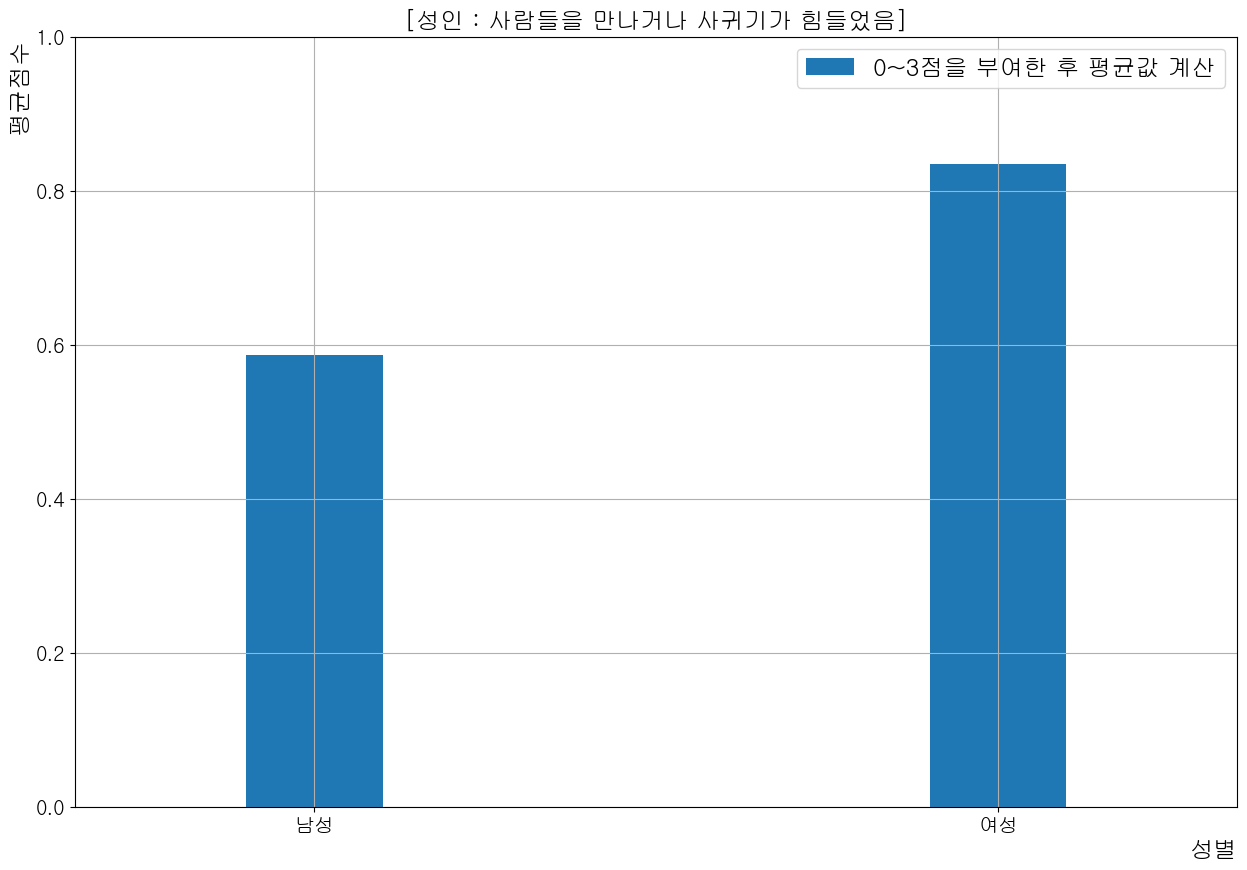

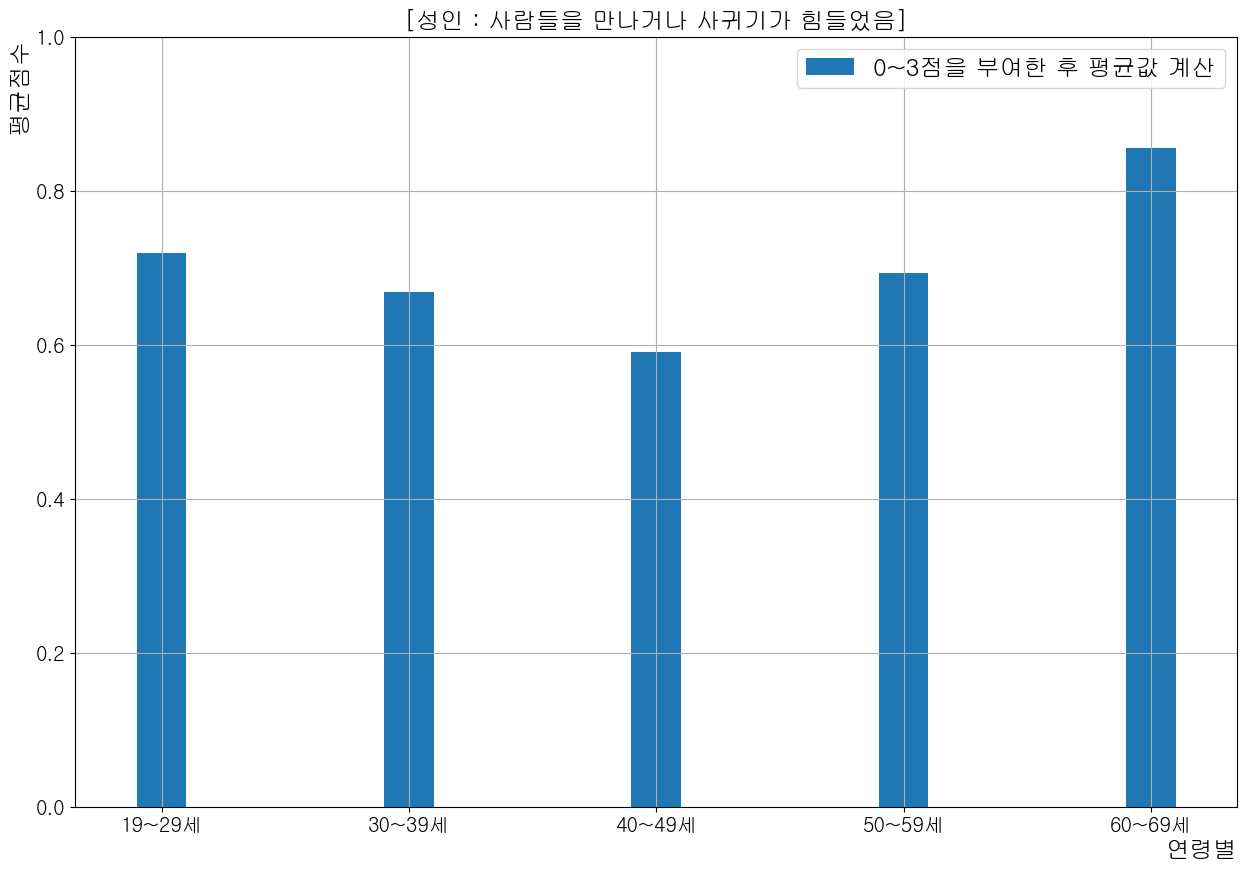

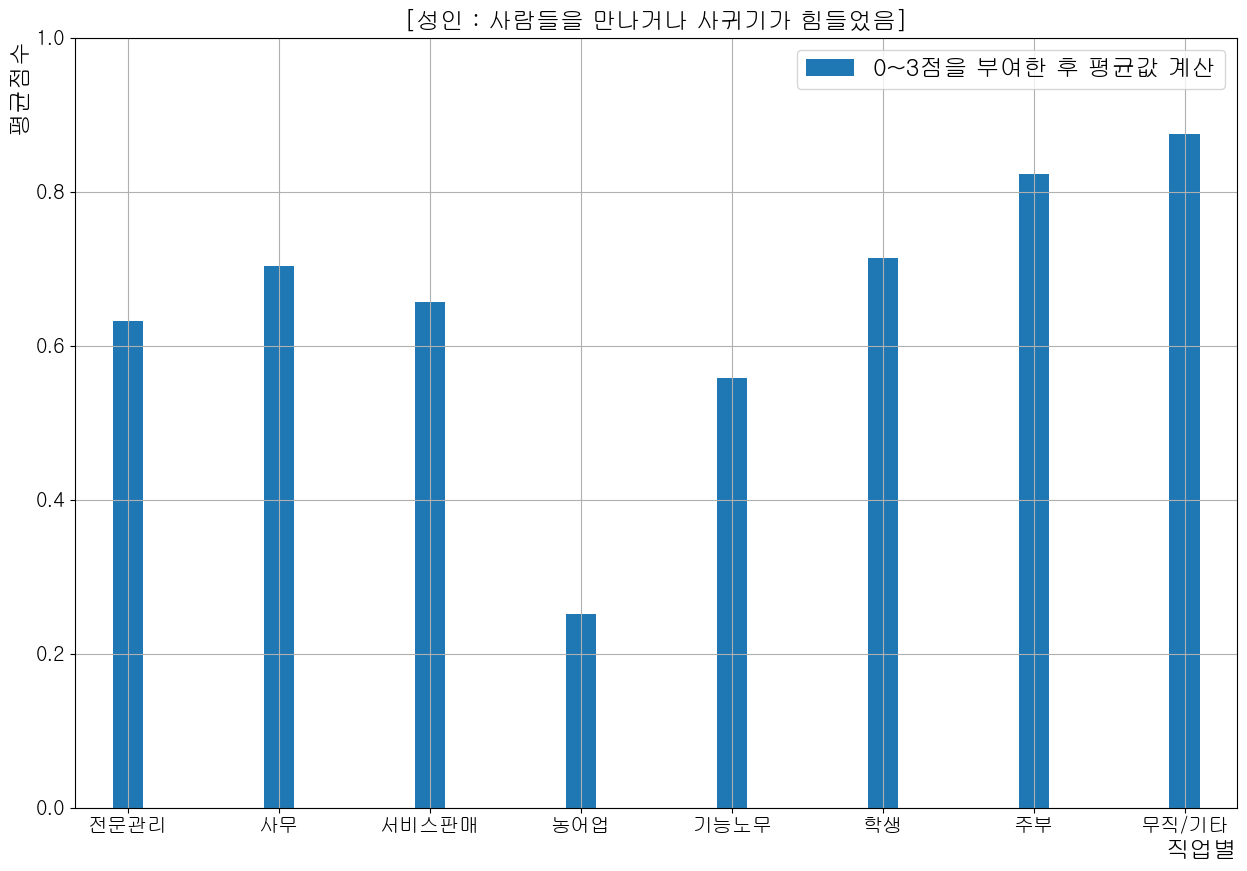

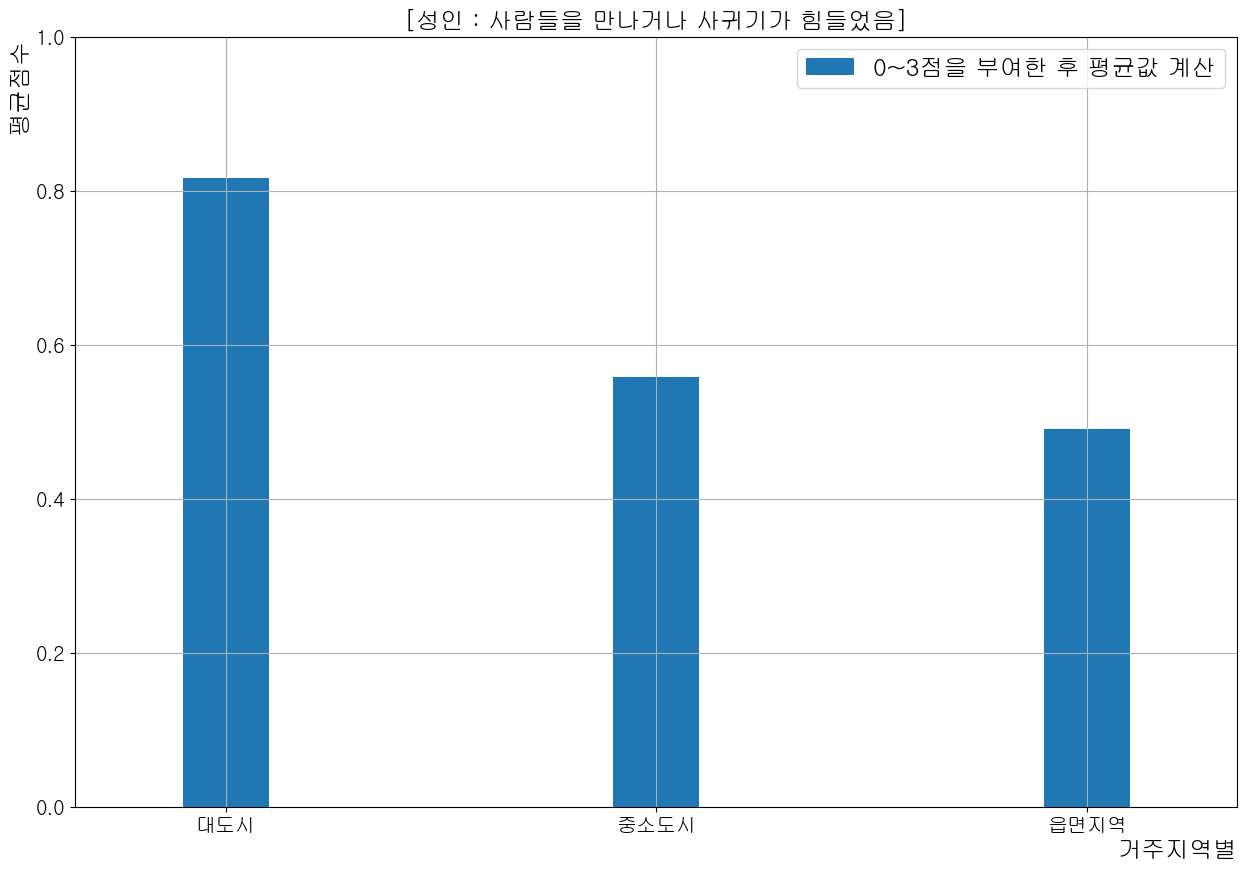

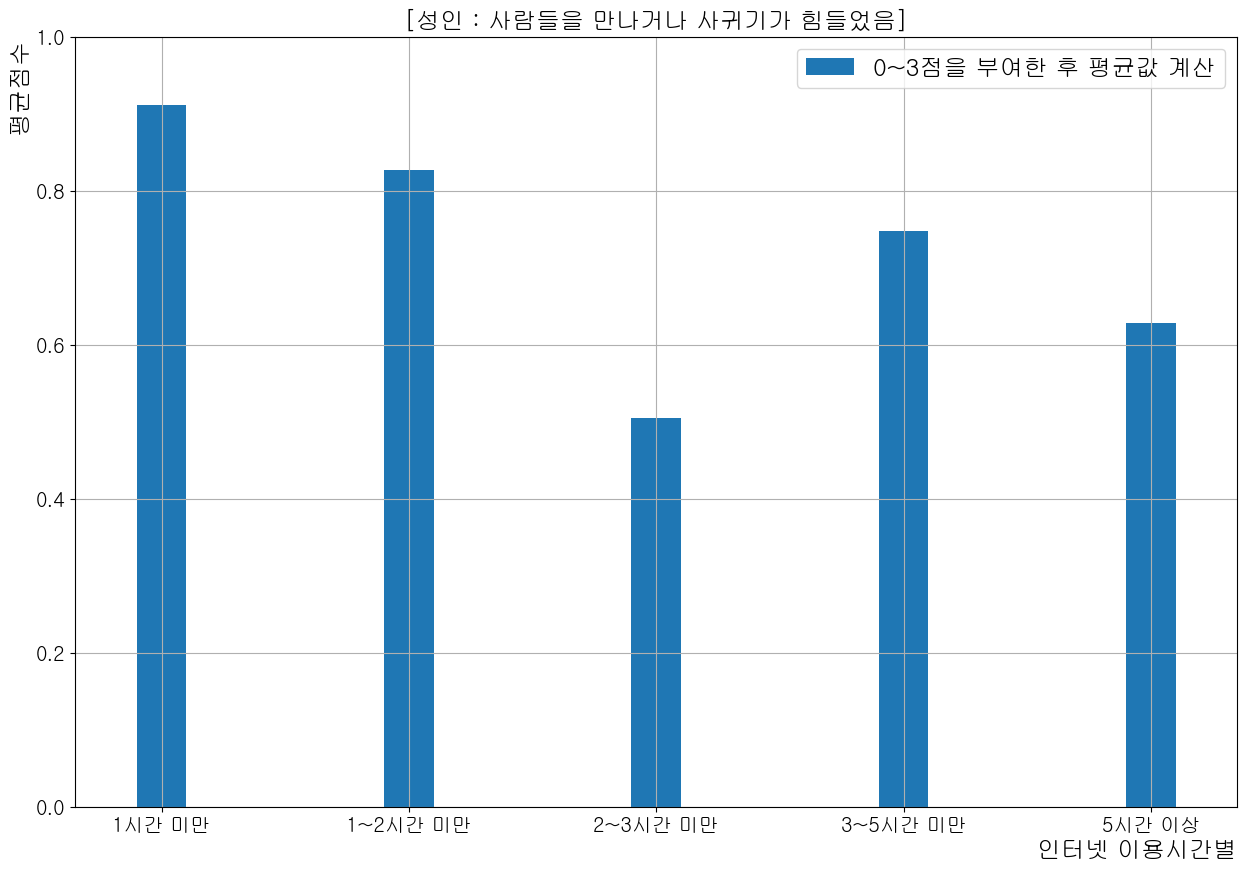

In [54]:
graph3_ad(gender, '성별')
plt.title('[성인 : 사람들을 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')
graph3_ad(age, '연령별')
plt.title('[성인 : 사람들을 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')
graph3_ad(job, '직업별')
plt.title('[성인 : 사람들을 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')
graph3_ad(area, '거주지역별')
plt.title('[성인 : 사람들을 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')
graph3_ad(hour, '인터넷 이용시간별')
plt.title('[성인 : 사람들을 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')


---------------------------

In [55]:
file3 = '../data_adult/성인피해_사이버폭력_피해_경험_후_심리상태__3자해_자살을_하고_싶은_생각이_들었음.csv'
file3 = clean(file3)

# 필요한 데이터 프레임만 선택하여 데이터프레임으로 만들었음
gender = select(file3, '성별')
age = select(file3, '연령별')
job = select(file3, '직업별')
area = select(file3, '거주지역별')
hour = select(file3, '인터넷 이용시간별')

gender = calc2(gender)
age = calc2(age)
job = calc2(job)
area = calc2(area)
hour = calc2(hour)

gender = gender['평균']
age = age['평균']
job = job['평균']
area = area['평균']
hour = hour['평균']

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  52 non-null     float64
 1   그렇지 않다     52 non-null     float64
 2   그렇다        52 non-null     float64
 3   매우 그렇다     52 non-null     float64
dtypes: float64(4)
memory usage: 5.1 KB


Text(0.5, 1.0, '[성인 : 자해, 자살을 하고 싶은 생각이 들었음]')

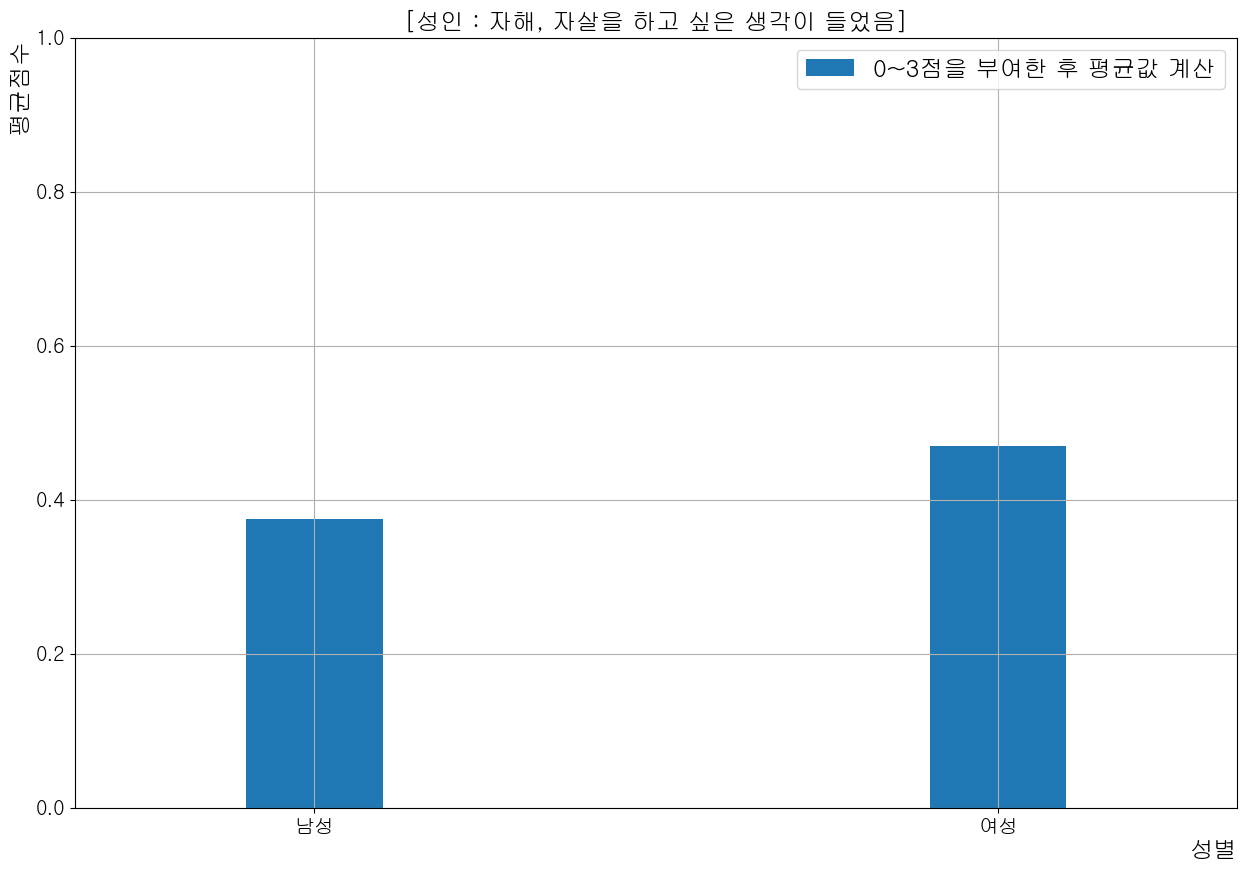

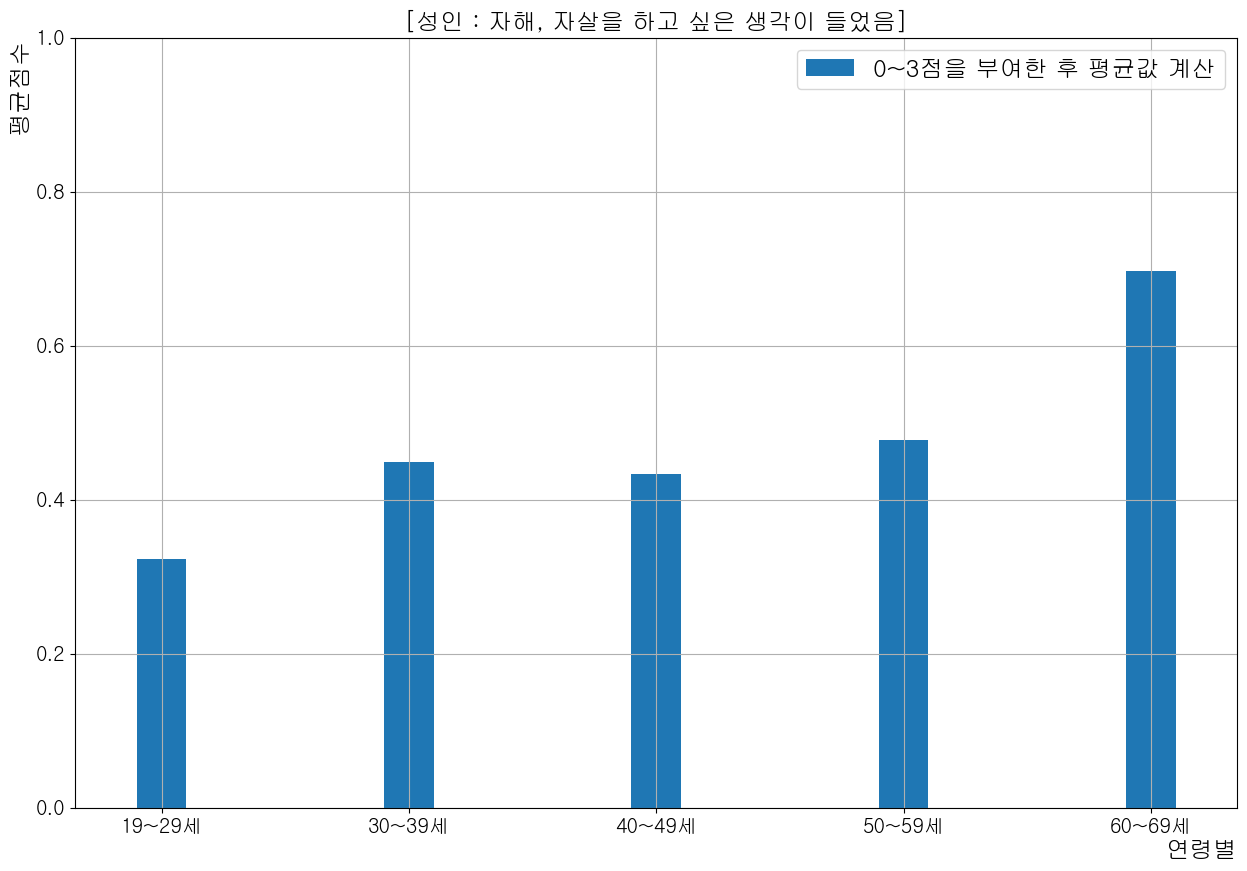

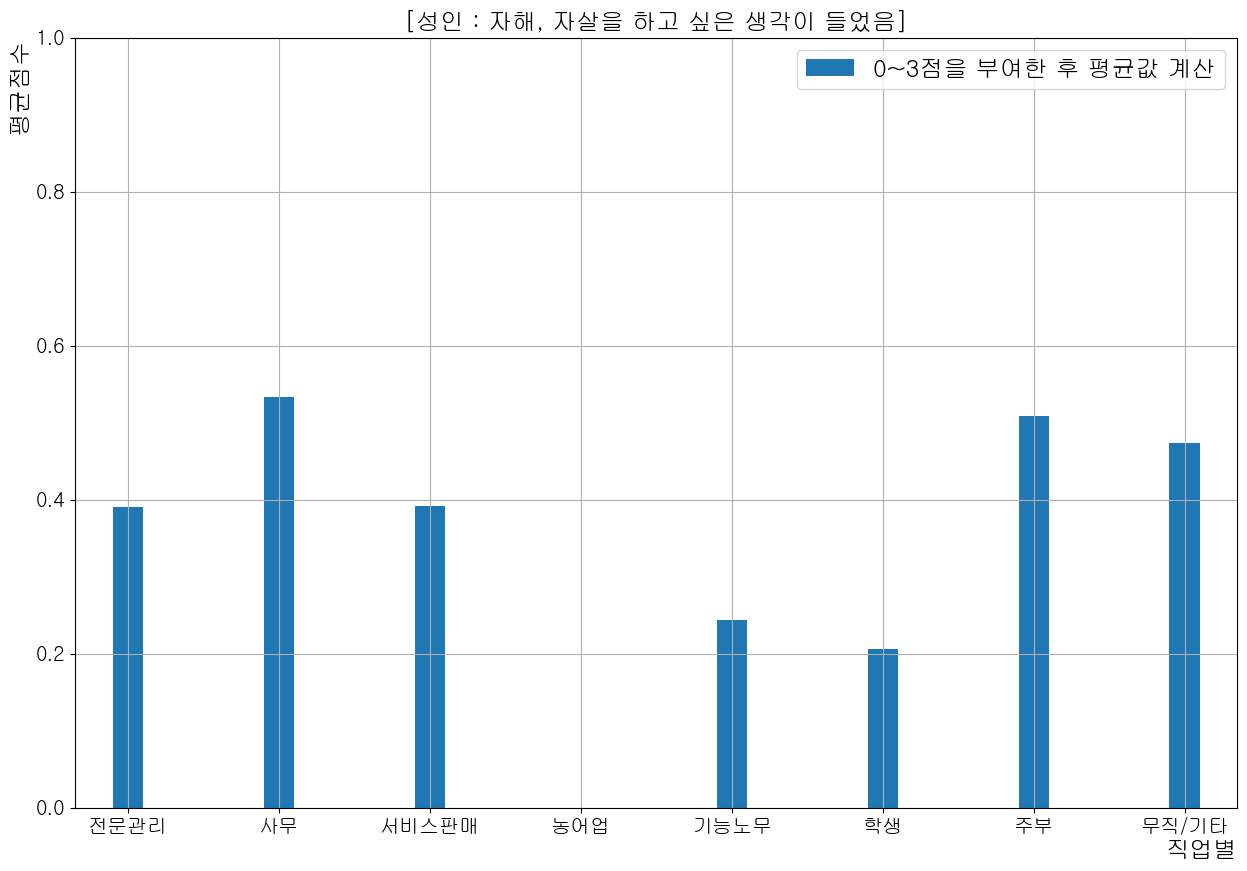

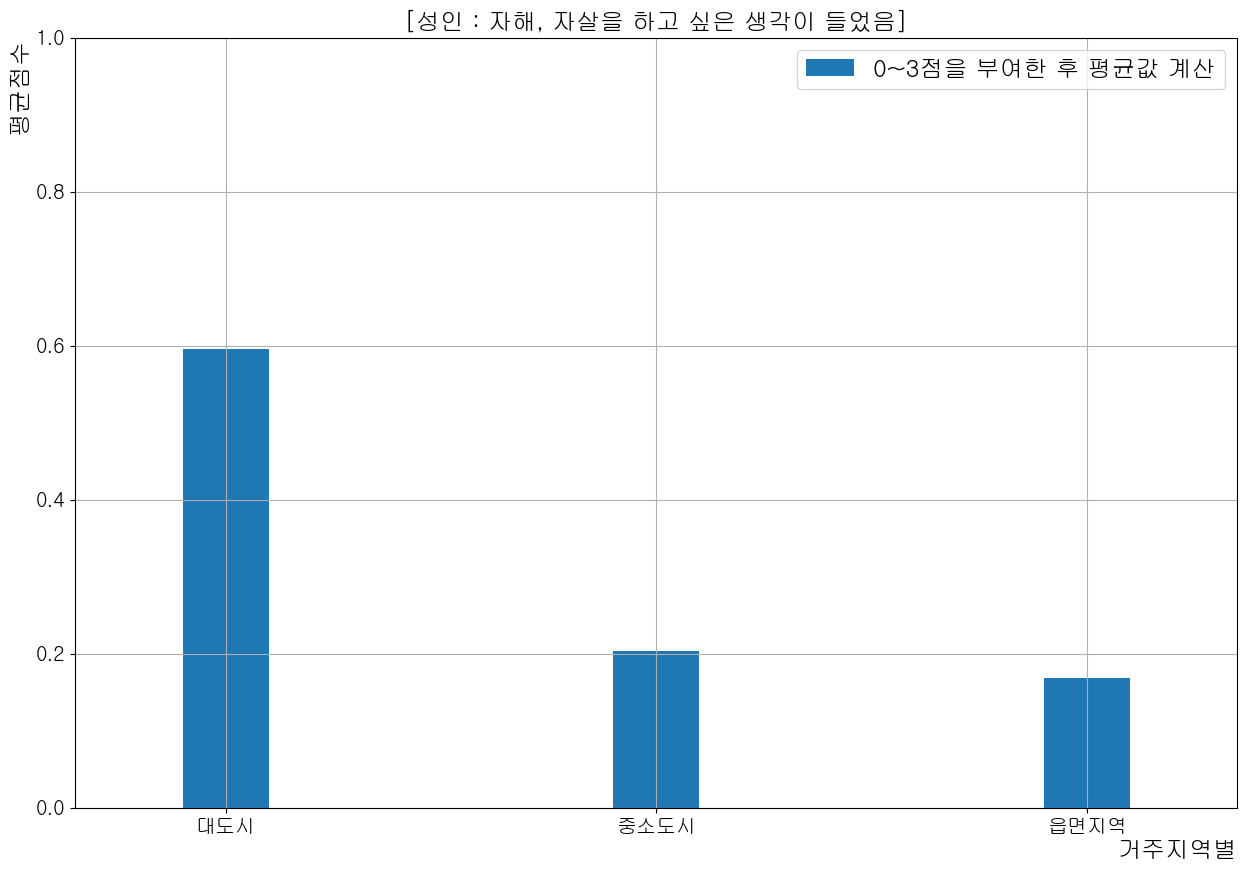

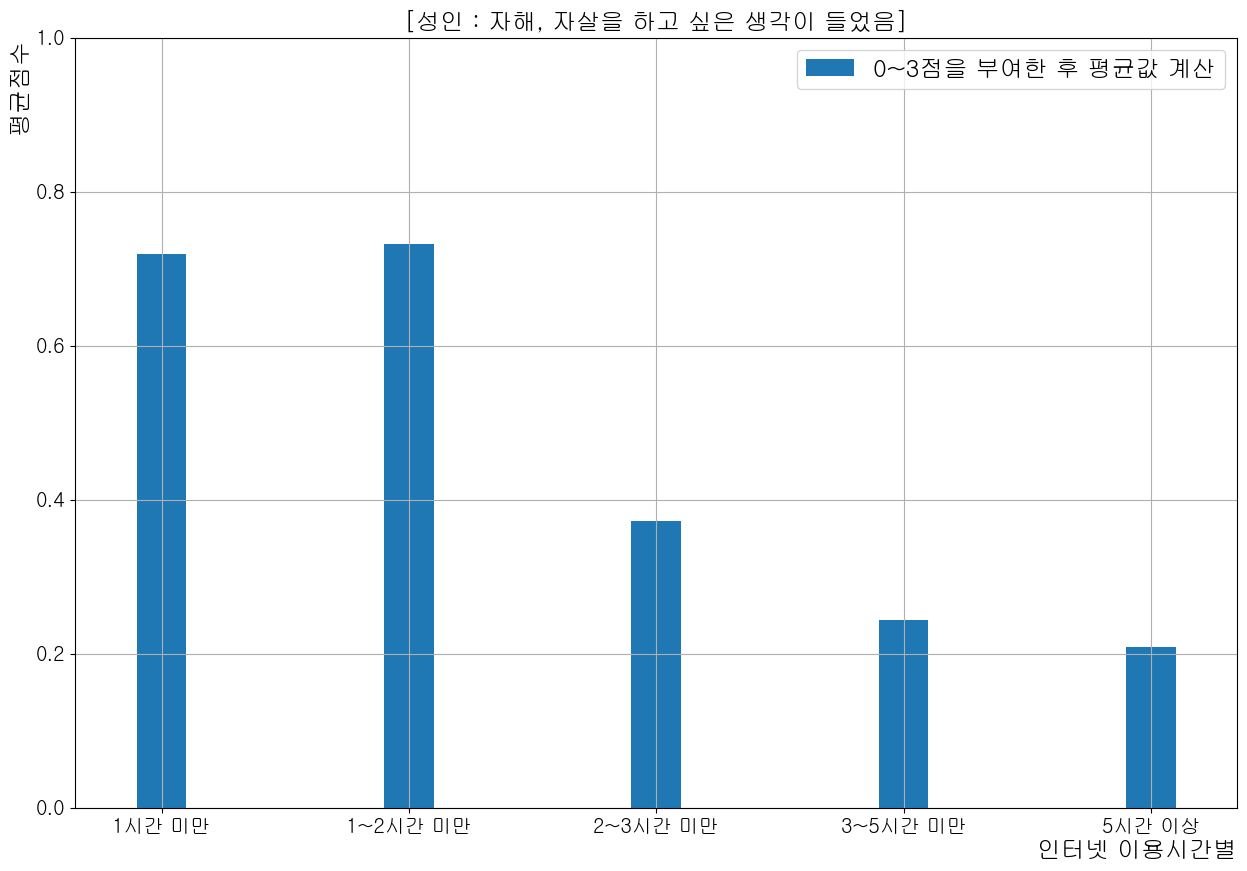

In [56]:
# 그래프 그리기

graph3_ad(gender, '성별')
plt.title('[성인 : 자해, 자살을 하고 싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_ad(age, '연령별')
plt.title('[성인 : 자해, 자살을 하고 싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_ad(job, '직업별')
plt.title('[성인 : 자해, 자살을 하고 싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_ad(area, '거주지역별')
plt.title('[성인 : 자해, 자살을 하고 싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_ad(hour, '인터넷 이용시간별')
plt.title('[성인 : 자해, 자살을 하고 싶은 생각이 들었음]', fontsize = 'xx-large')

--------------------------

In [57]:
file4 = '../data_adult/성인피해_사이버폭력_피해_경험_후_심리상태__4우울·불안하거나_심한_스트레스를_받았음.csv'
file4 = clean(file4)

# 필요한 데이터 프레임만 선택하여 데이터프레임으로 만들었음
gender = select(file4, '성별')
age = select(file4, '연령별')
job = select(file4, '직업별')
area = select(file4, '거주지역별')
hour = select(file4, '인터넷 이용시간별')

gender = calc2(gender)
age = calc2(age)
job = calc2(job)
area = calc2(area)
hour = calc2(hour)

gender = gender['평균']
age = age['평균']
job = job['평균']
area = area['평균']
hour = hour['평균']

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  52 non-null     float64
 1   그렇지 않다     52 non-null     float64
 2   그렇다        52 non-null     float64
 3   매우 그렇다     52 non-null     float64
dtypes: float64(4)
memory usage: 5.1 KB


Text(0.5, 1.0, '[성인 : 우울,불안하거나 심한 스트레스를 받았음]')

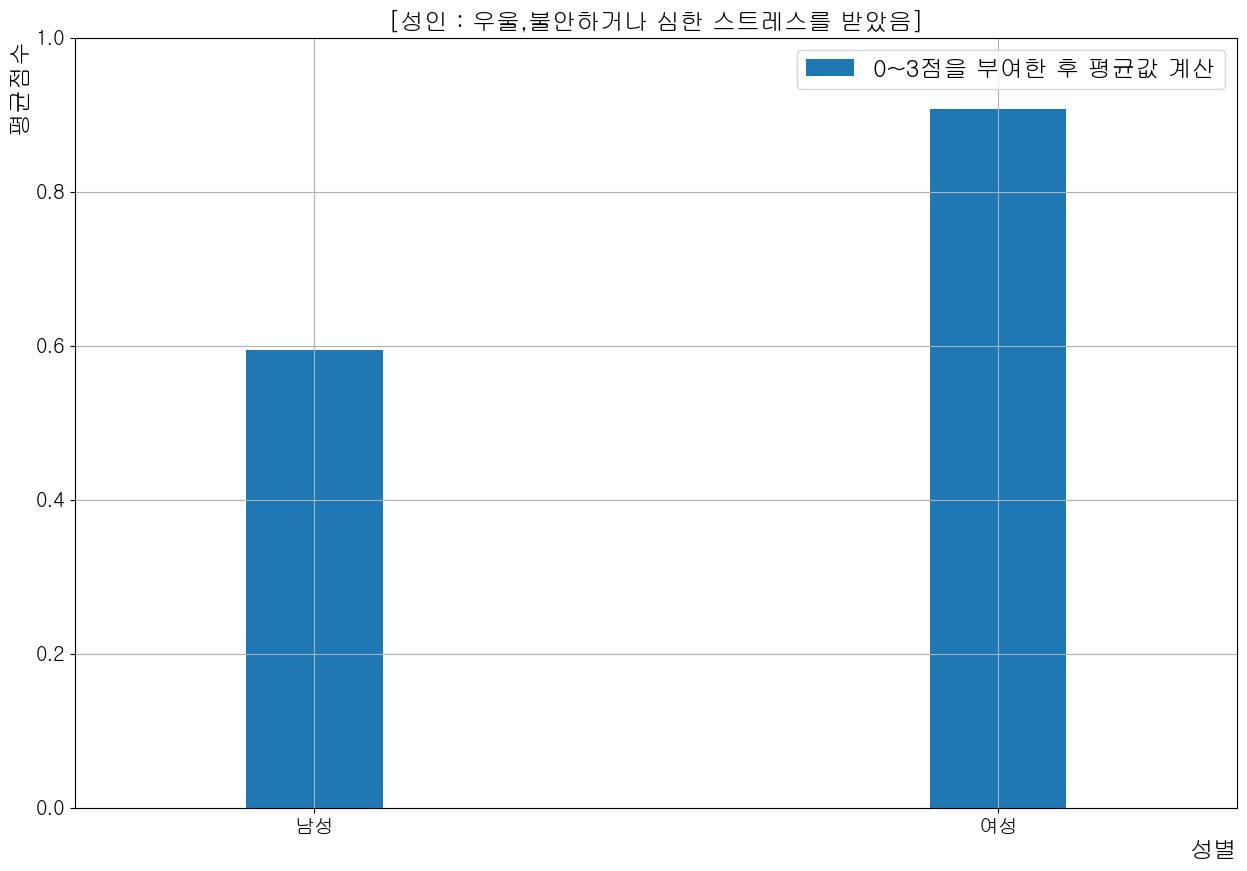

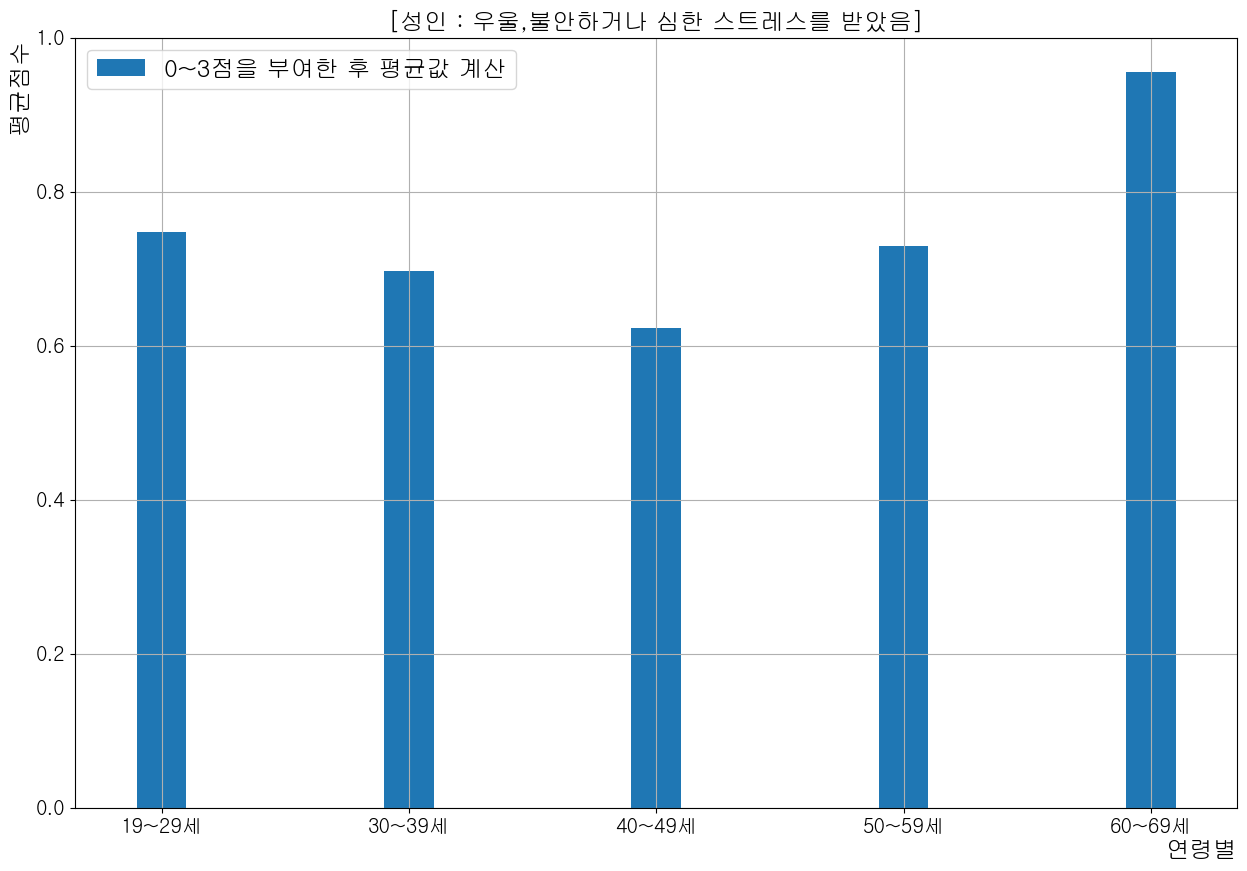

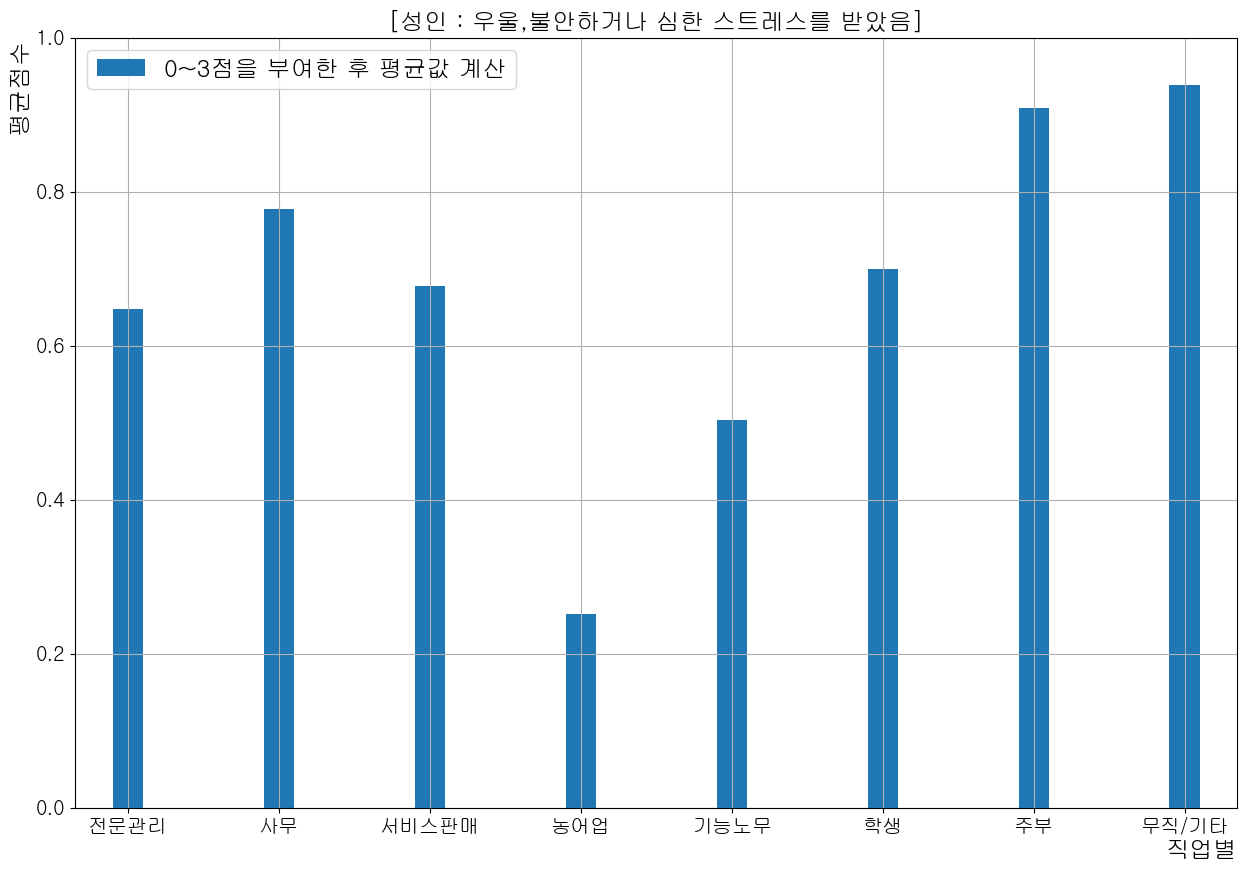

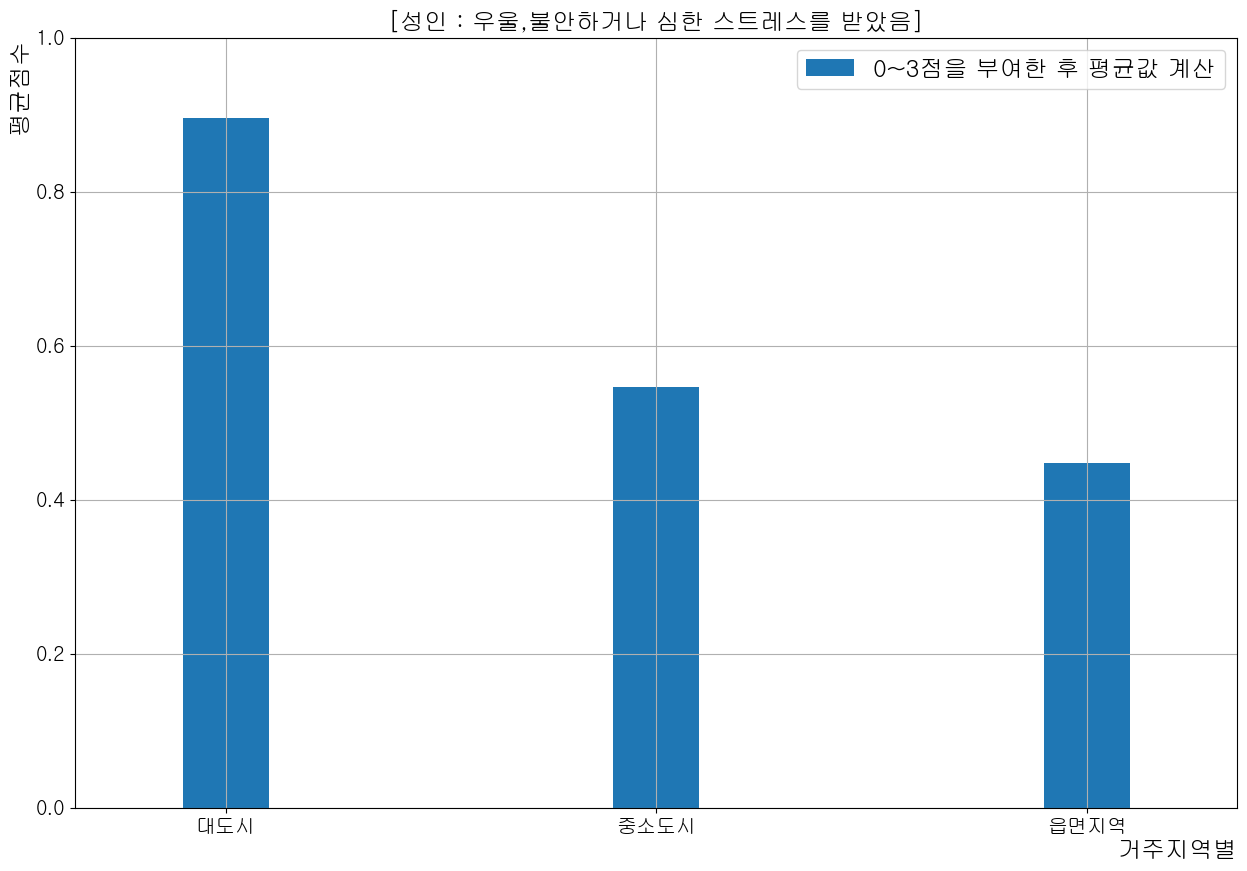

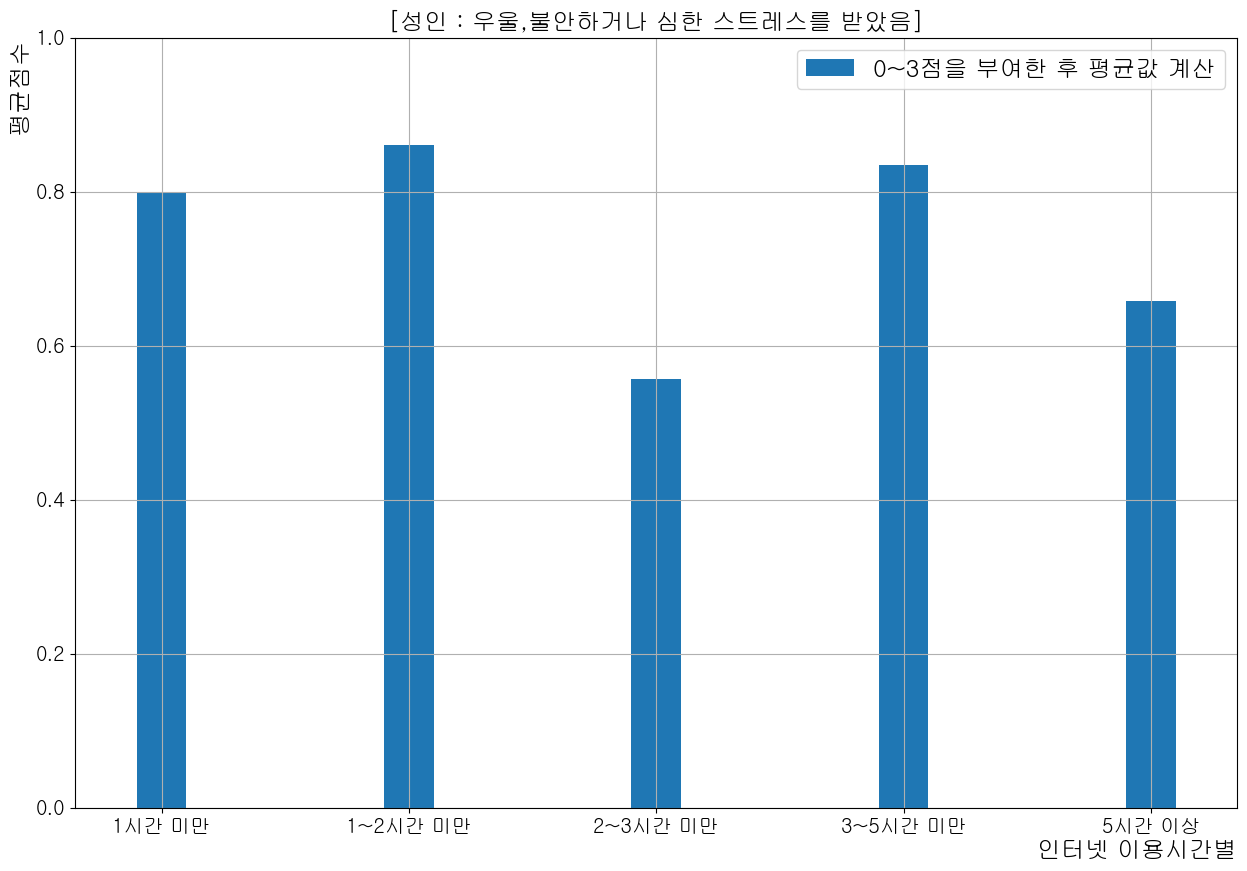

In [58]:
# 그래프 그리기

graph3_ad(gender, '성별')
plt.title('[성인 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_ad(age, '연령별')

plt.title('[성인 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_ad(job, '직업별')

plt.title('[성인 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_ad(area, '거주지역별')

plt.title('[성인 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_ad(hour, '인터넷 이용시간별')

plt.title('[성인 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')

---------------------------

In [59]:
file5 = '../data_adult/성인피해_사이버폭력_피해_경험_후_심리상태__5불면증__두통_복통_등의_증상이_생겼음.csv'
file5 = clean(file5)

# 필요한 데이터 프레임만 선택하여 데이터프레임으로 만들었음
gender = select(file5, '성별')
age = select(file5, '연령별')
job = select(file5, '직업별')
area = select(file5, '거주지역별')
hour = select(file5, '인터넷 이용시간별')

gender = calc2(gender)
age = calc2(age)
job = calc2(job)
area = calc2(area)
hour = calc2(hour)

gender = gender['평균']
age = age['평균']
job = job['평균']
area = area['평균']
hour = hour['평균']

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 52 entries, ('전체', '소계') to ('사이버폭력예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  52 non-null     float64
 1   그렇지 않다     52 non-null     float64
 2   그렇다        52 non-null     float64
 3   매우 그렇다     52 non-null     float64
dtypes: float64(4)
memory usage: 5.1 KB


Text(0.5, 1.0, '[성인 : 불면증, 두통, 복통 등의 증상이 생겼음]')

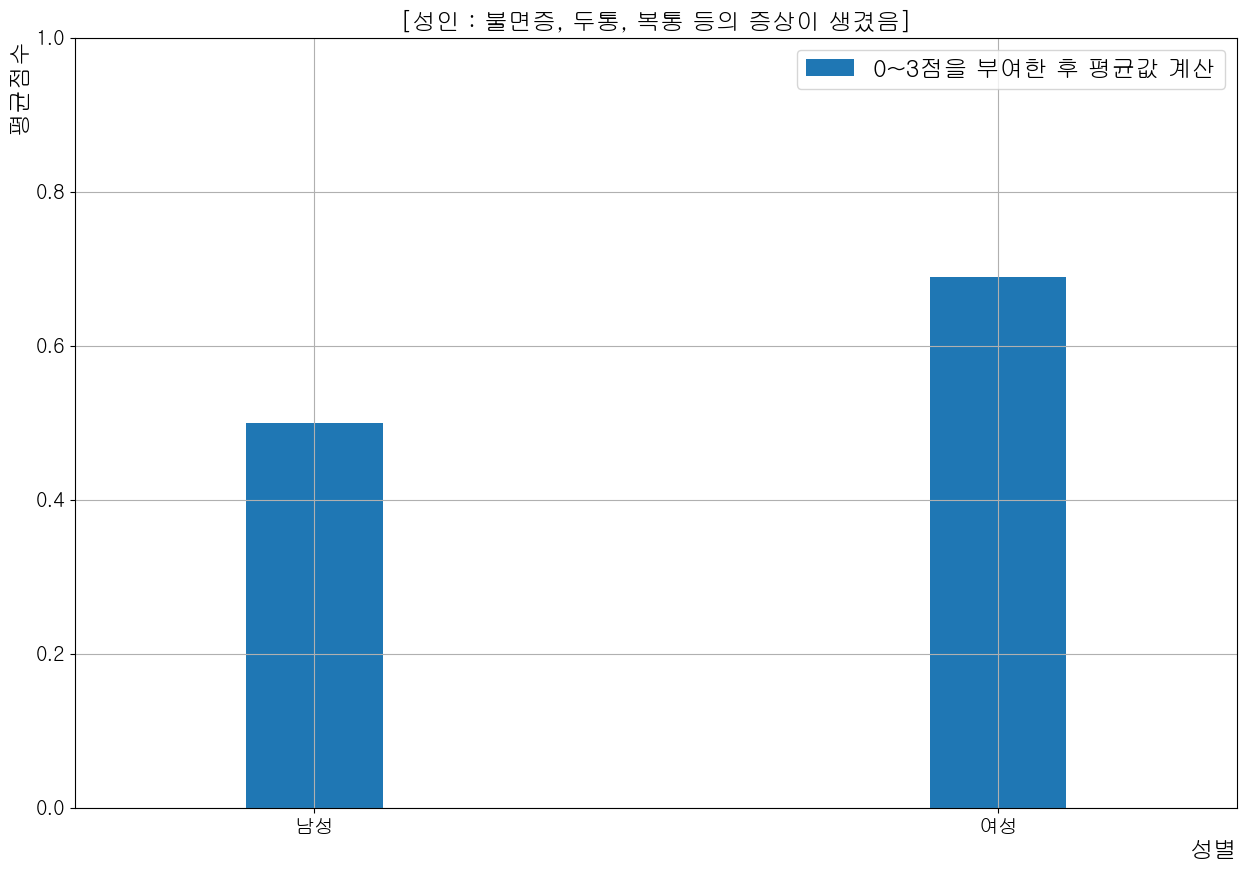

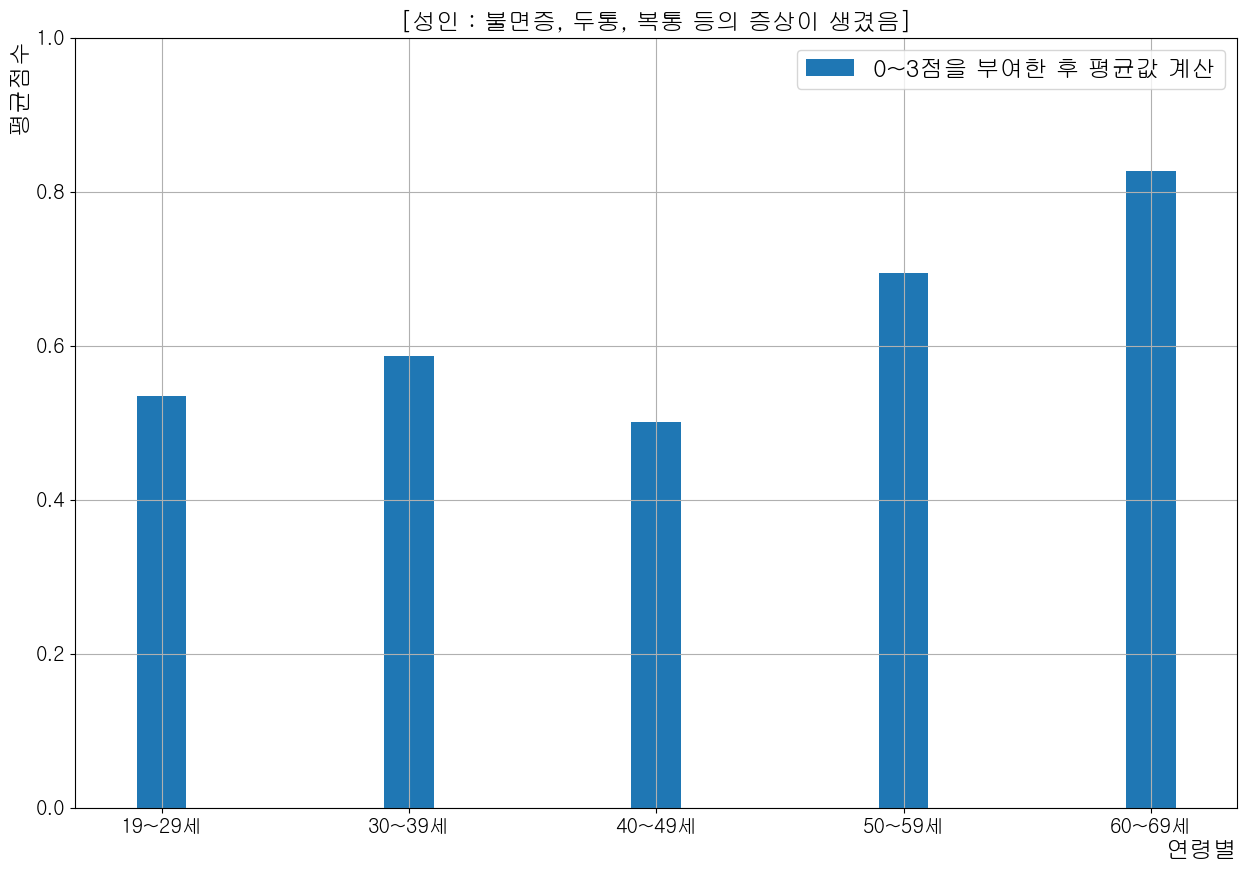

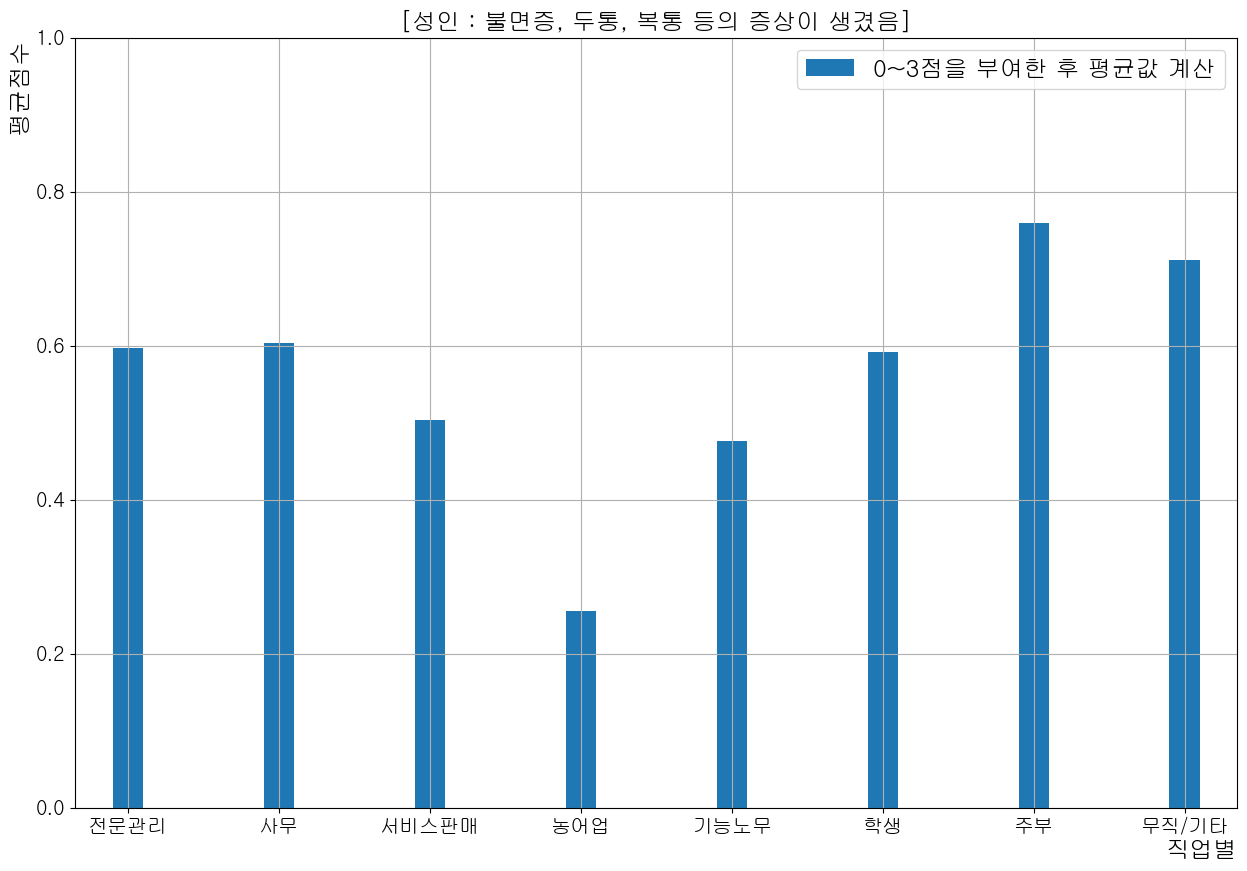

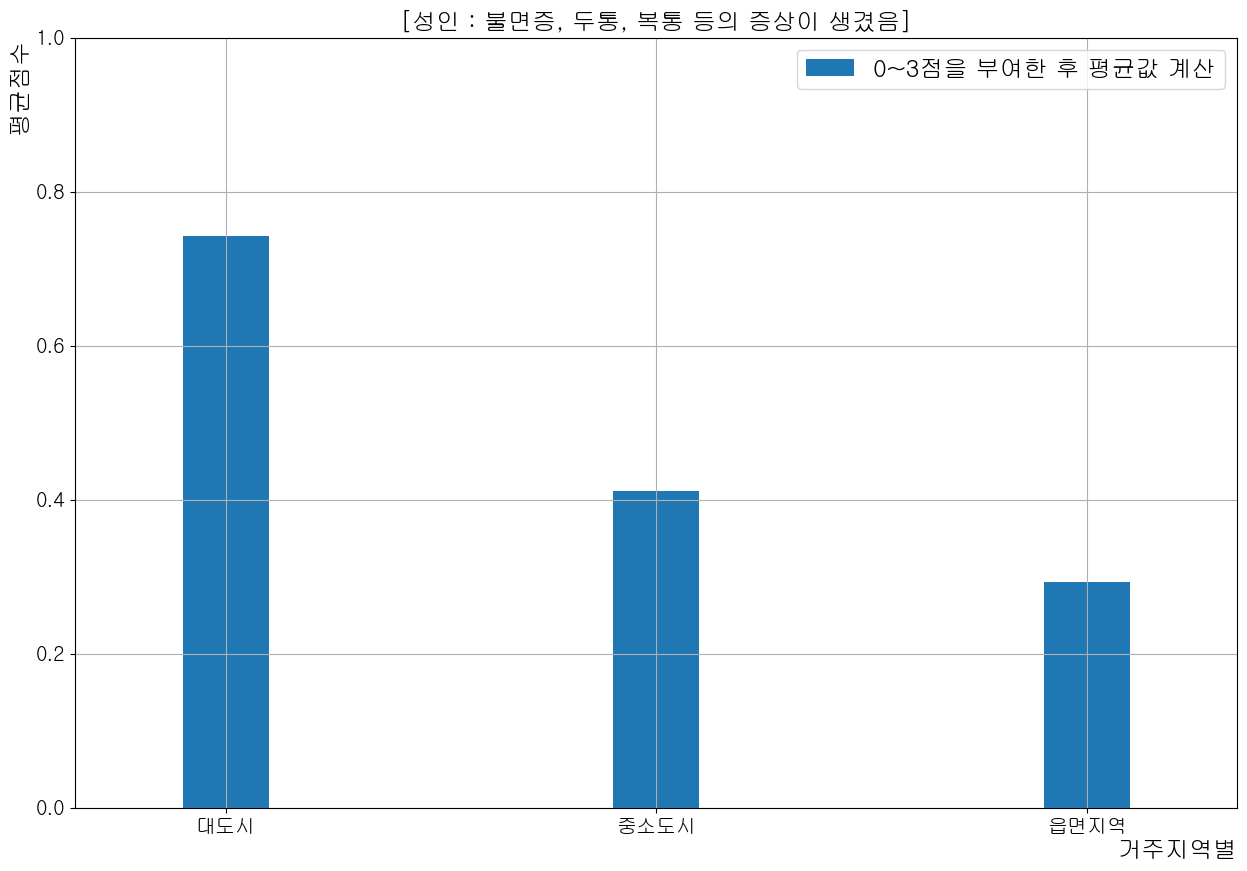

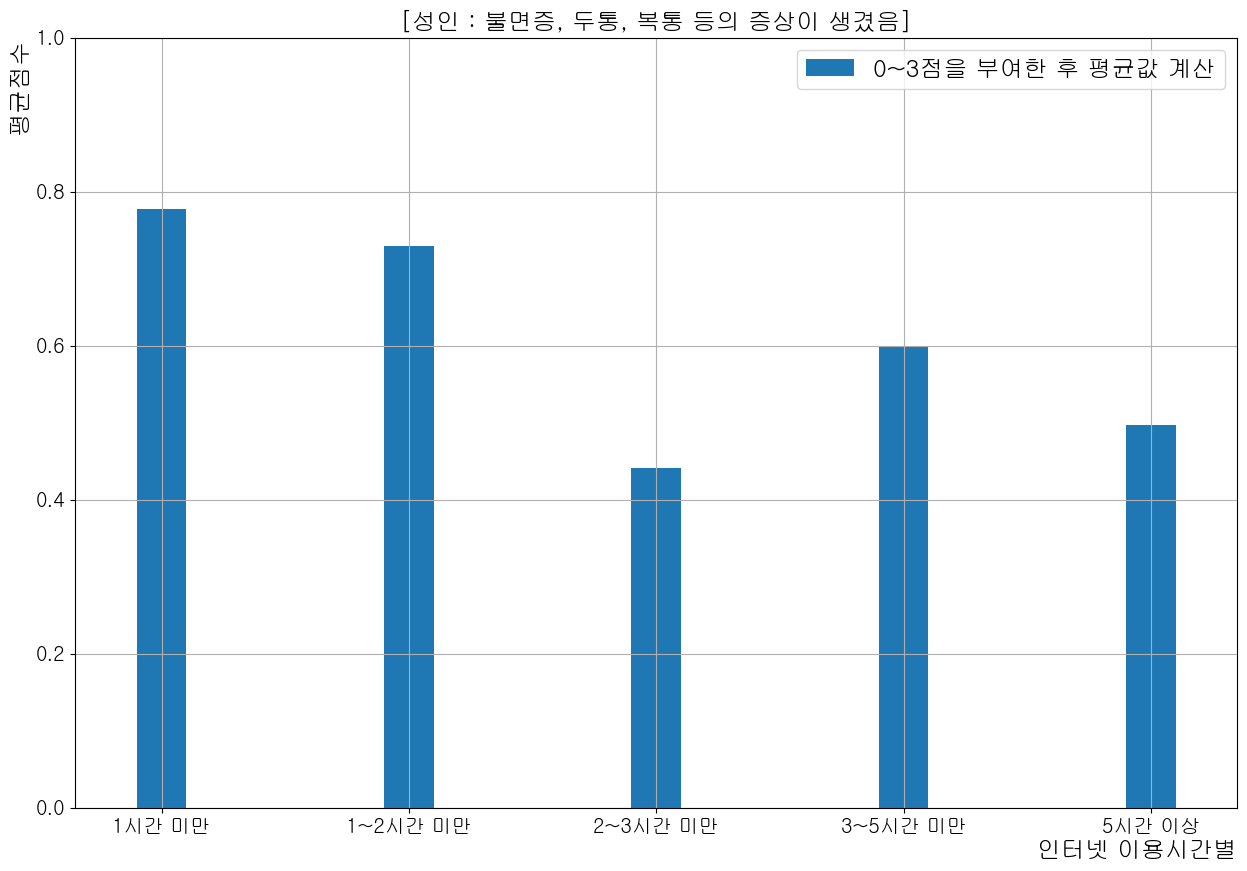

In [60]:
# 그래프 그리기

graph3_ad(gender, '성별')

plt.title('[성인 : 불면증, 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')
graph3_ad(age, '연령별')
plt.title('[성인 : 불면증, 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')

graph3_ad(job, '직업별')
plt.title('[성인 : 불면증, 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')

graph3_ad(area, '거주지역별')
plt.title('[성인 : 불면증, 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')

graph3_ad(hour, '인터넷 이용시간별')
plt.title('[성인 : 불면증, 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')


# 학생

In [61]:
def graph3_stu(data_name, x):
    # 전체 크기 설정
    plt.figure(figsize=(15,10))
    # 각 데이터 프레임 별로 시각화를 함
    graph = data_name.plot(kind = 'bar', grid = True, xlabel = x , ylabel ='평균점수', rot = 0,
                           fontsize = 'x-large', width = 0.2, color = 'orange')
    graph = plt.ylim(0.0, 1.0)
    graph = plt.xlabel(x, loc = 'right', fontsize = 'xx-large')
    graph = plt.ylabel('평균점수', loc = 'top', fontsize = 'xx-large')
    graph = plt.title('[학생 - 피해 경험 후 심리 상태]', fontsize = 'xx-large')
    graph = plt.legend(['0~3점을 부여한 후 평균값 계산'], fontsize = 'xx-large')

In [62]:
file1 = '../data_student/학생피해_사이버폭력_피해_경험_후_심리상태__1친구를_만나거나_사귀기가_힘들었음.csv'
file1 = clean(file1)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [63]:
# 필요한 데이터프레임만 선택하여 분리함
gender = select(file1, '성별')
school = select(file1, '학령별')
area = select(file1, '거주지역별')
family = select(file1, '가정형편별')
score = select(file1, '학업성적별')

gender = calc2(gender)
school = calc2(school)
area = calc2(area)
family = calc2(family)
score = calc2(score)

gender = gender['평균']
school = school['평균']
area = area['평균']
family = family['평균']
score = score['평균']

Text(0.5, 1.0, '[학생 : 친구를 만나거나 사귀기가 힘들었음]')

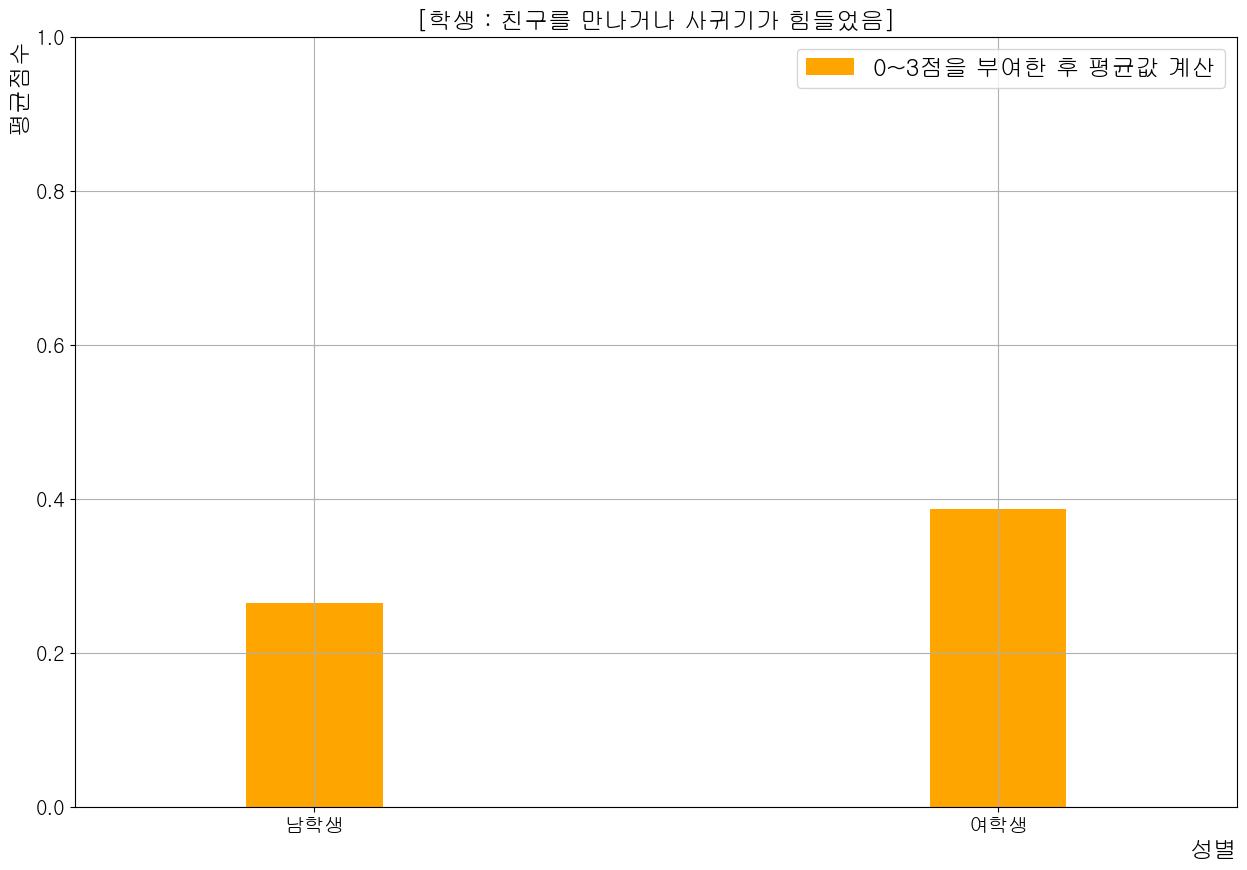

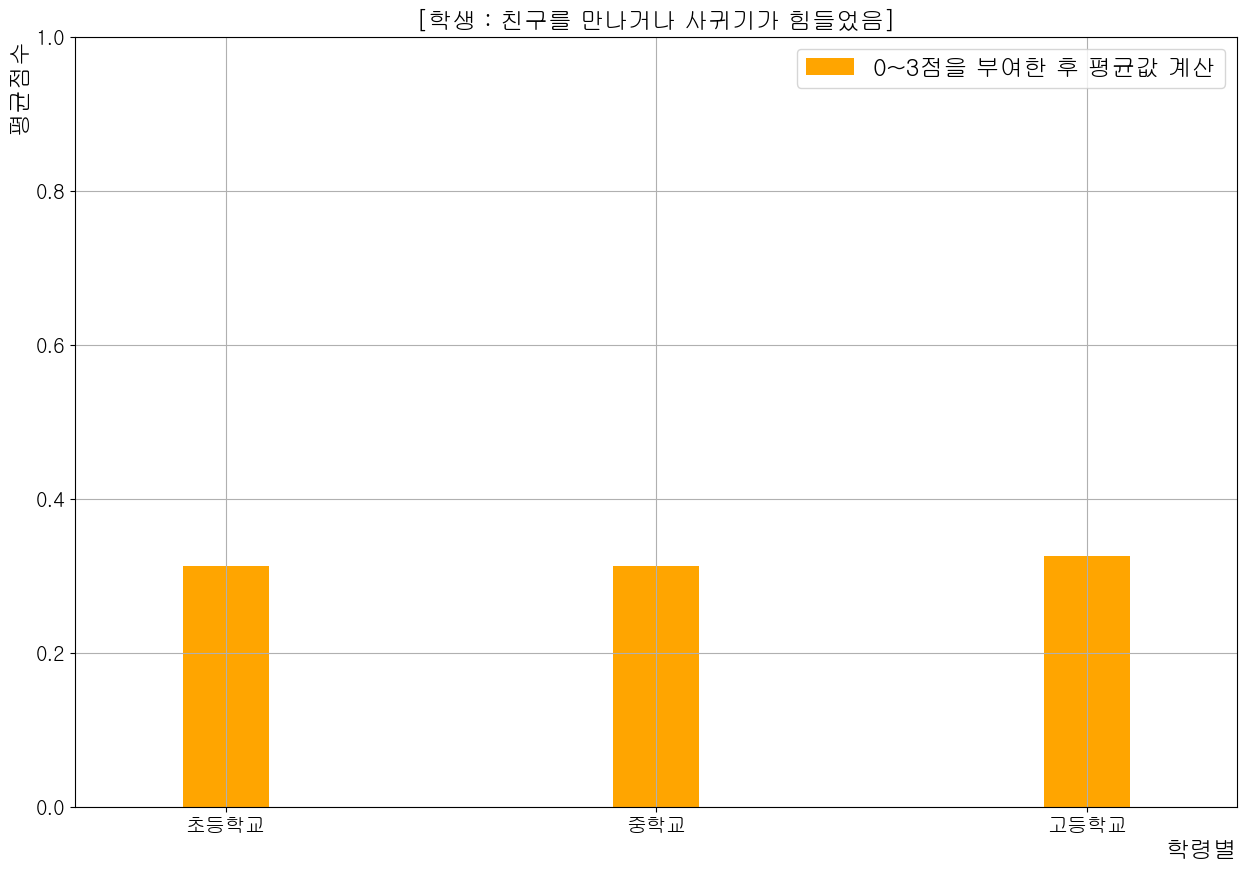

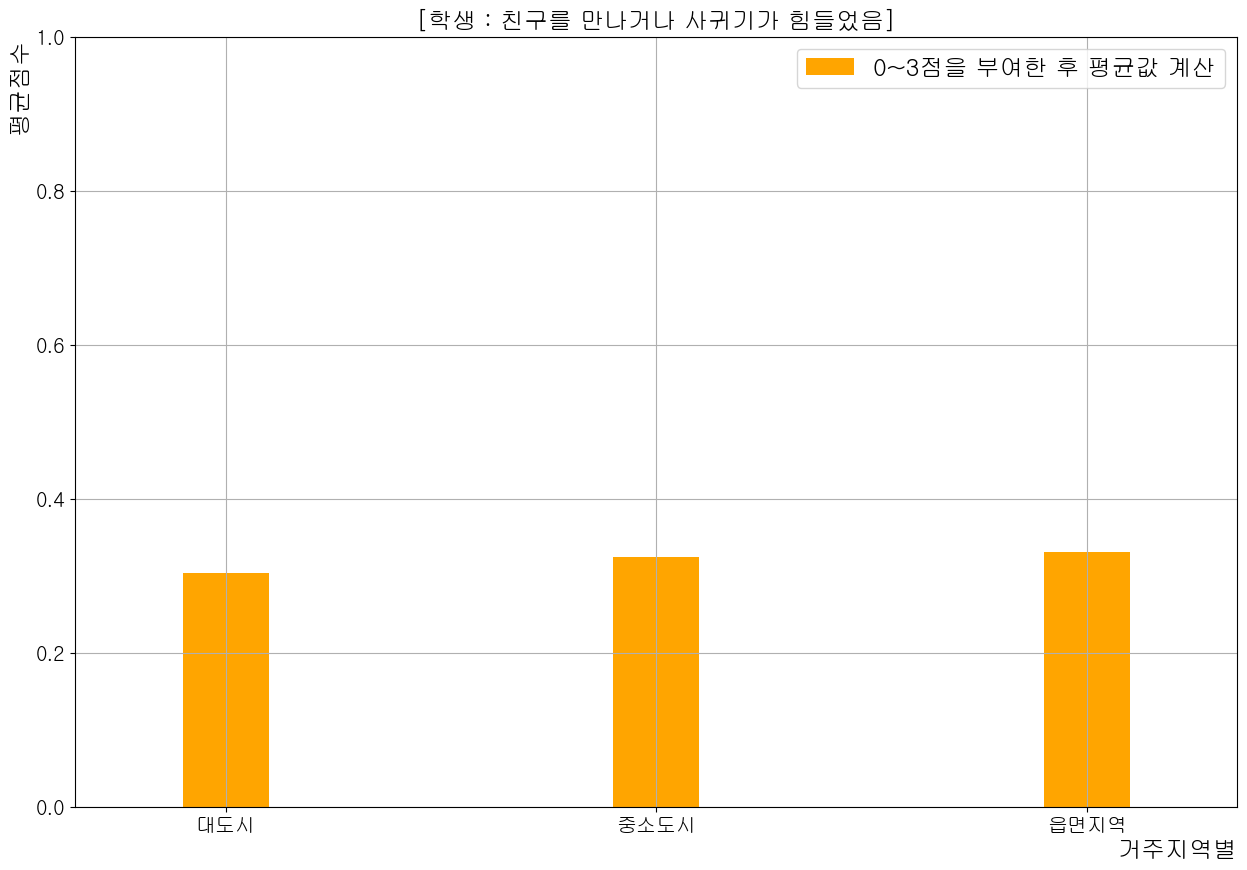

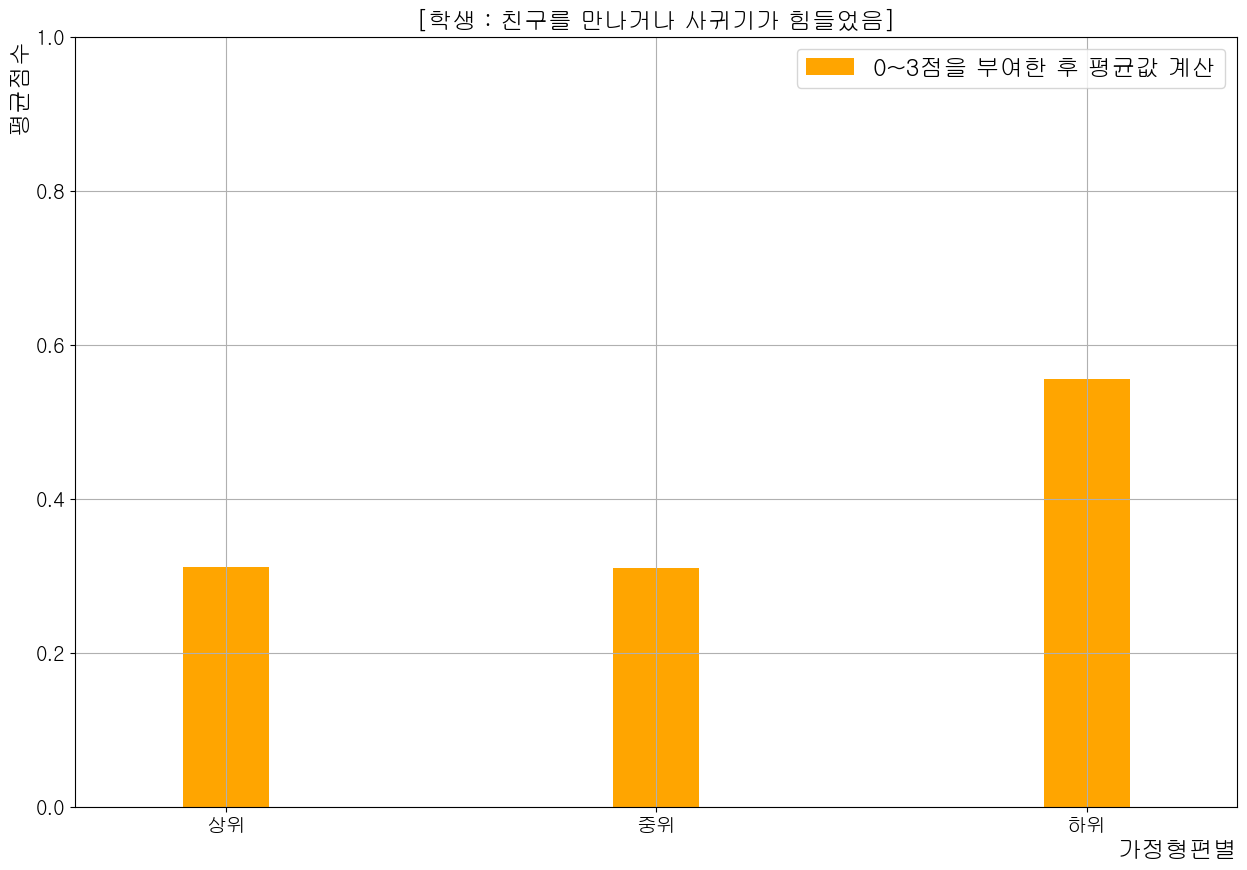

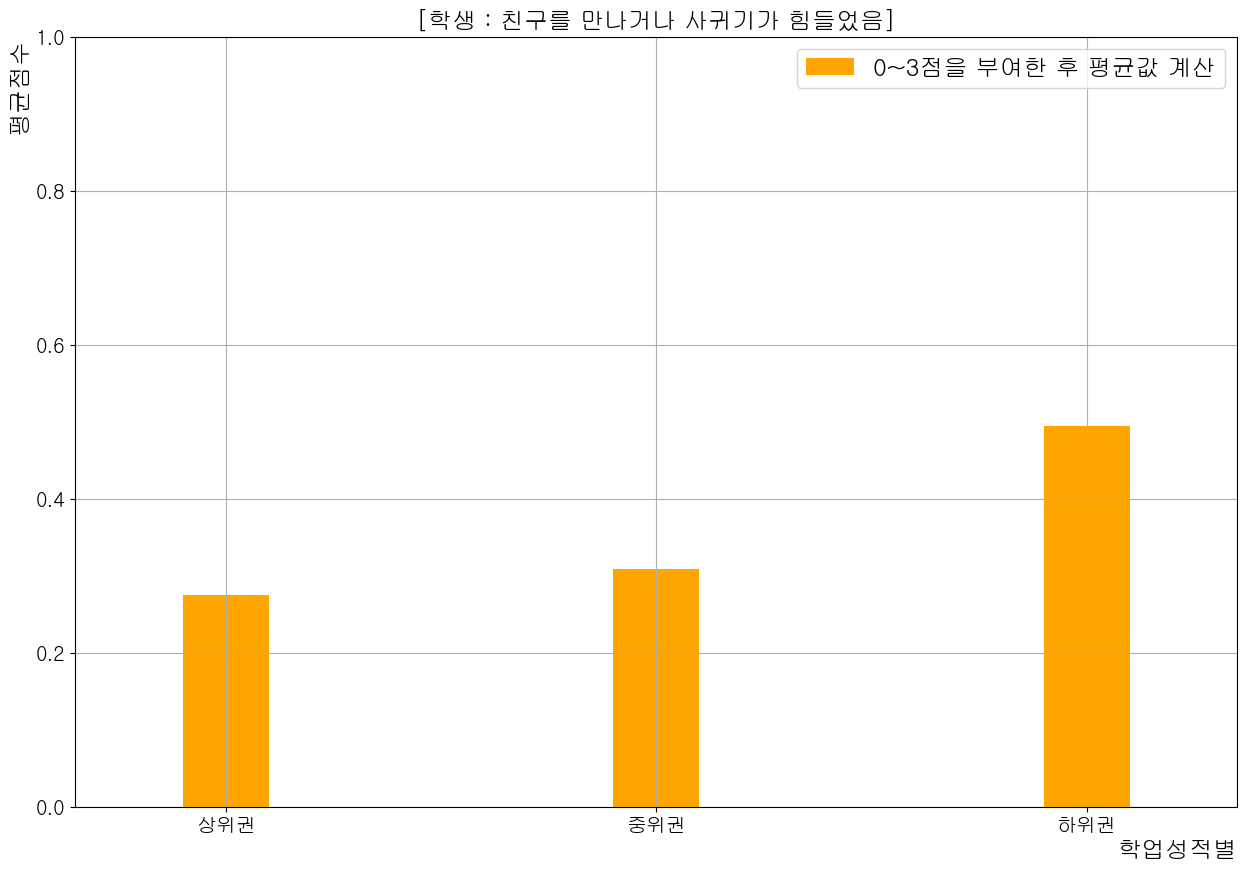

In [64]:
# 그래프 그리기
graph3_stu(gender, '성별')
plt.title('[학생 : 친구를 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')

graph3_stu(school, '학령별')
plt.title('[학생 : 친구를 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')
graph3_stu(area, '거주지역별')
plt.title('[학생 : 친구를 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')
graph3_stu(family, '가정형편별')
plt.title('[학생 : 친구를 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')
graph3_stu(score, '학업성적별')
plt.title('[학생 : 친구를 만나거나 사귀기가 힘들었음]', fontsize = 'xx-large')

----------------

In [65]:
file3 = '../data_student/학생피해_사이버폭력_피해_경험_후_심리상태__3자해_자살을_하고_싶은_생각이_들었음.csv'
file3 = clean(file3)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [66]:
# 필요한 데이터프레임만 선택하여 분리함
gender = select(file3, '성별')
school = select(file3, '학령별')
area = select(file3, '거주지역별')
family = select(file3, '가정형편별')
score = select(file3, '학업성적별')

gender = calc2(gender)
school = calc2(school)
area = calc2(area)
family = calc2(family)
score = calc2(score)

gender = gender['평균']
school = school['평균']
area = area['평균']
family = family['평균']
score = score['평균']

Text(0.5, 1.0, '[학생 : 자해, 자살을 하고싶은 생각이 들었음]')

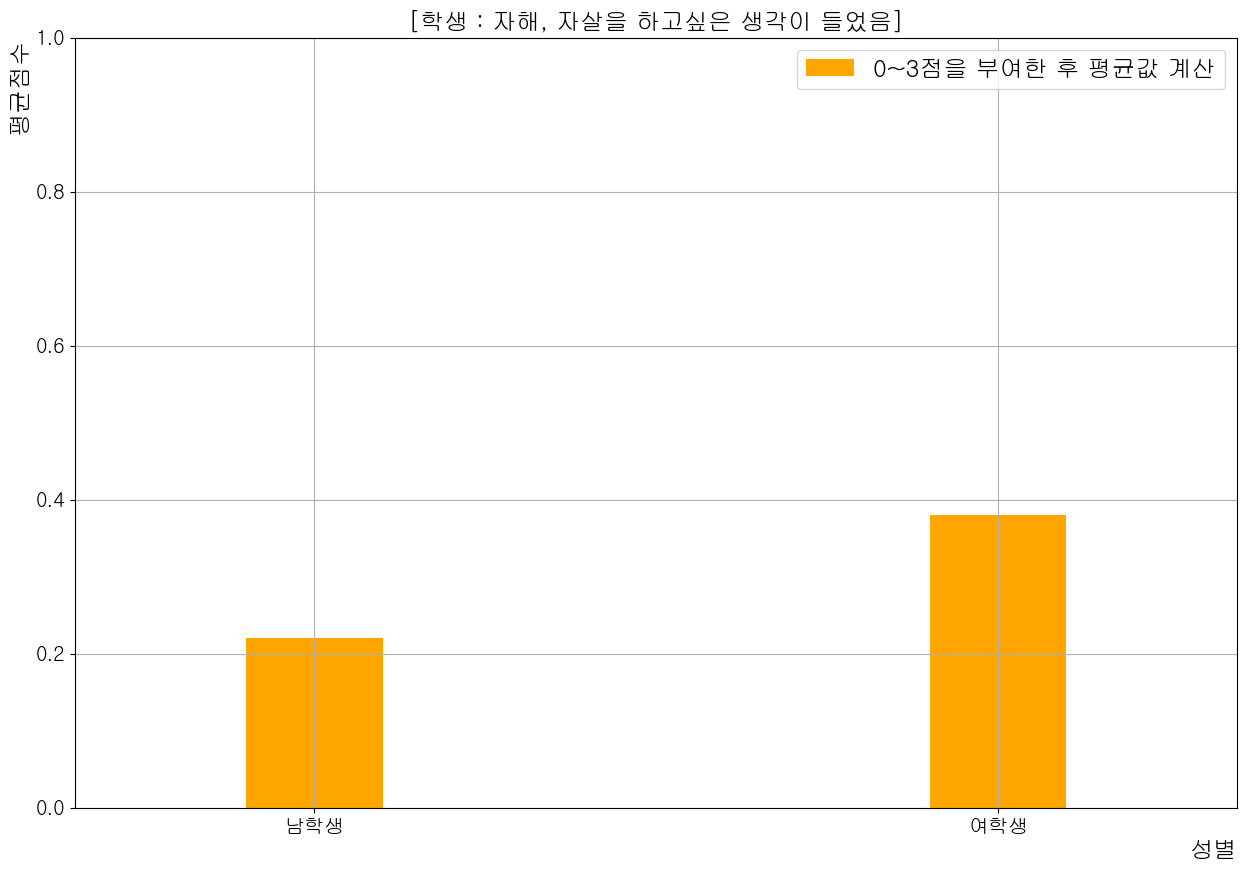

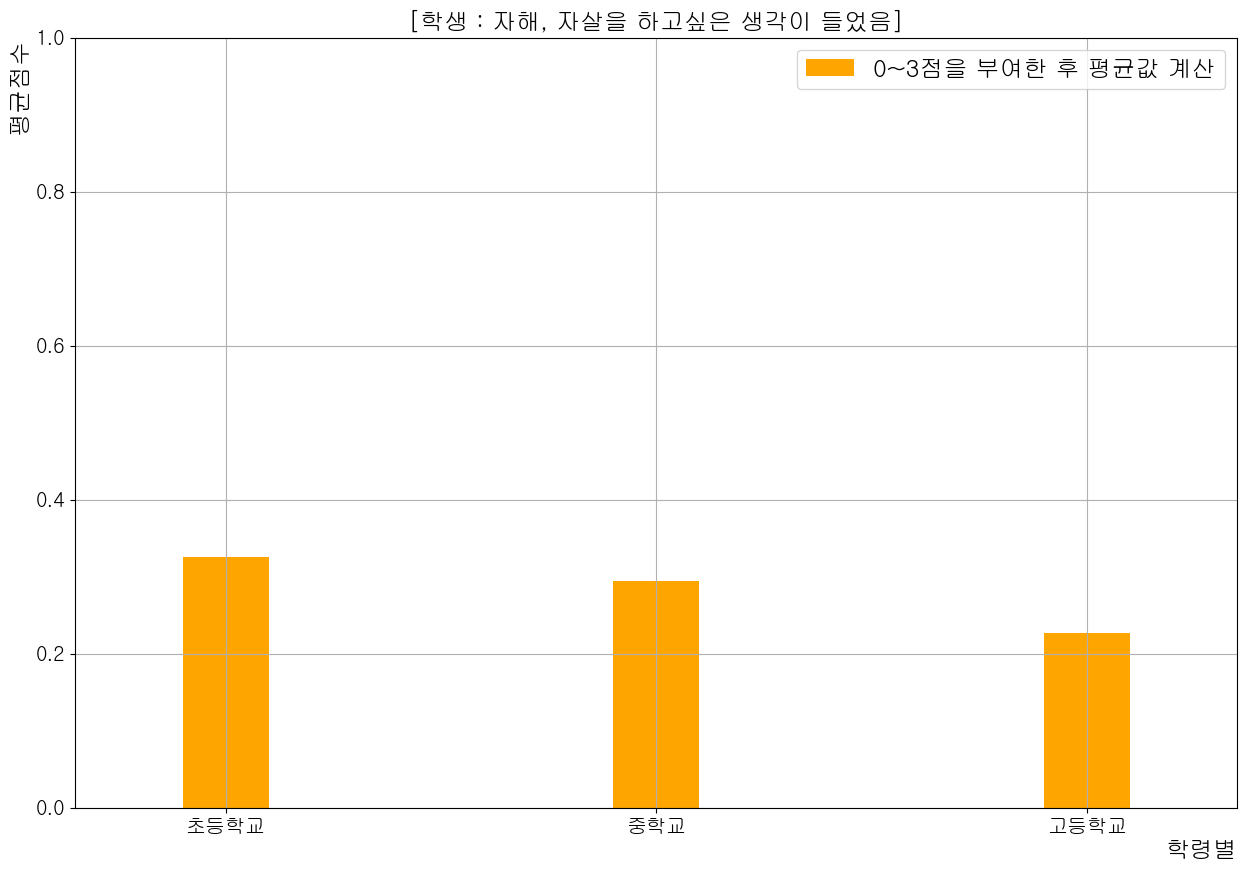

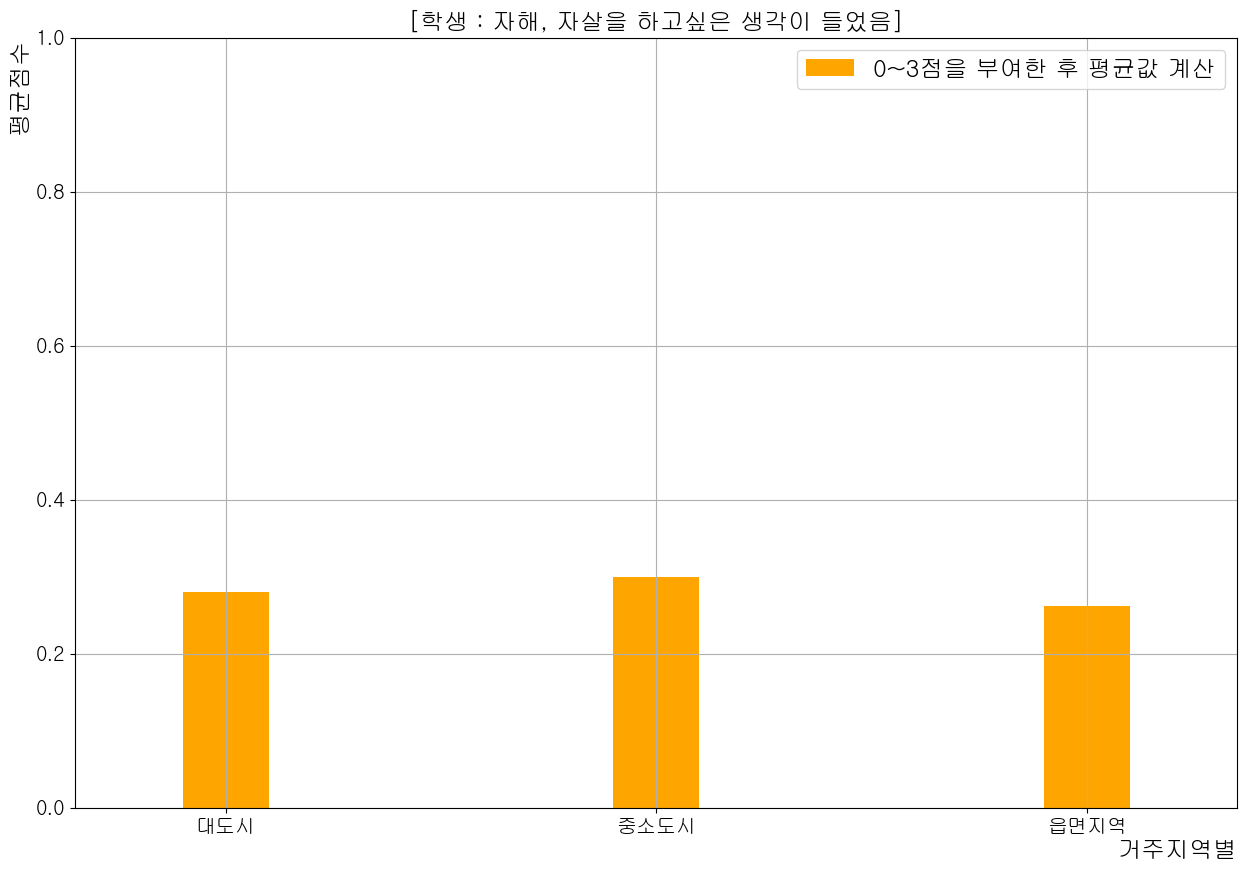

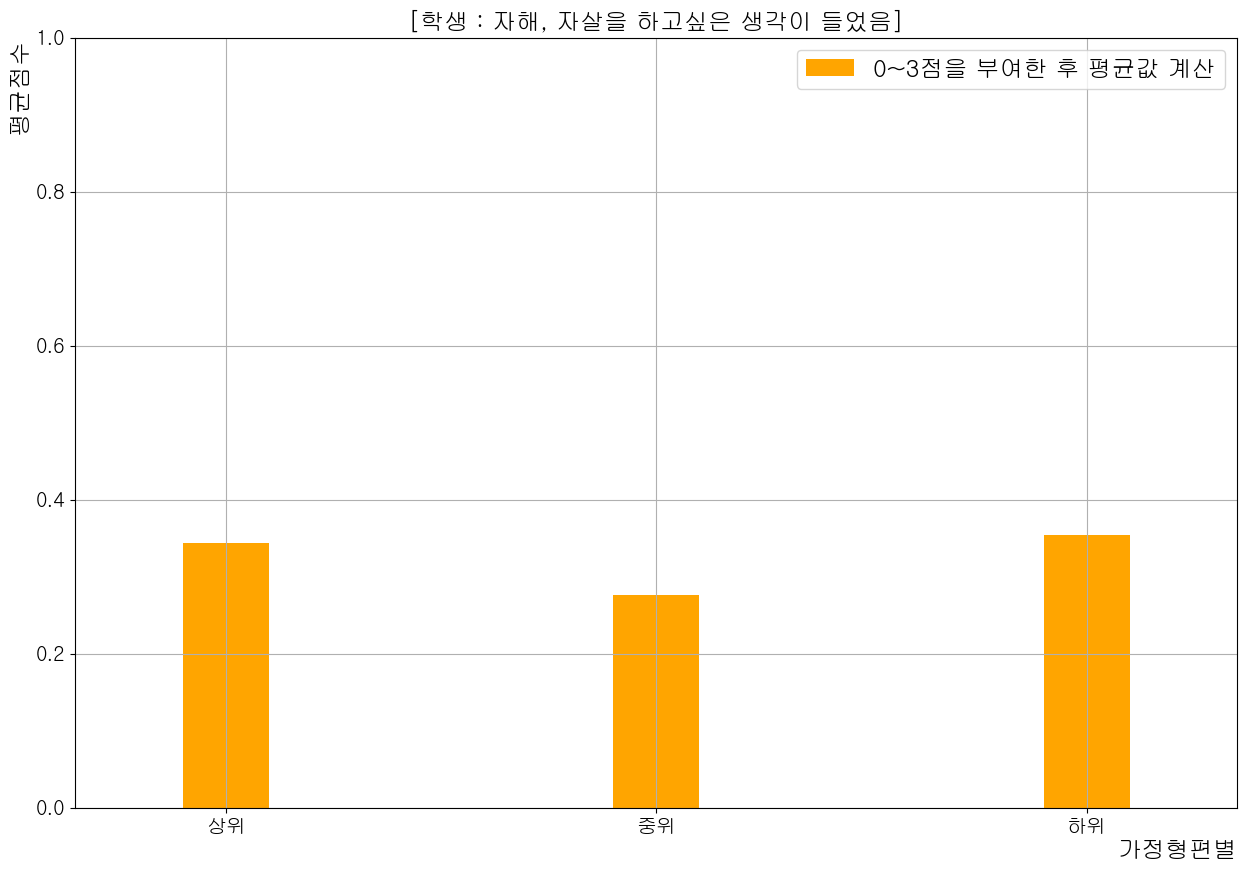

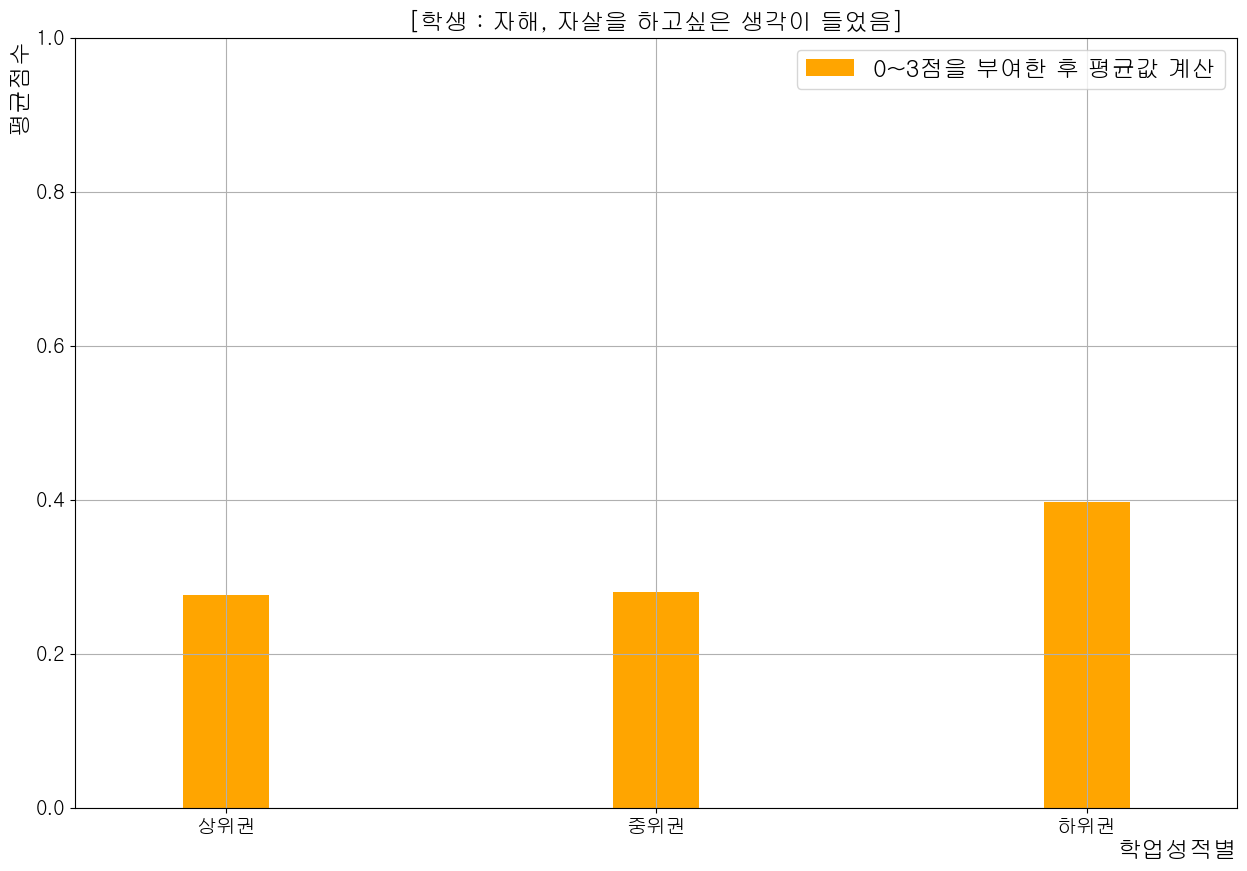

In [67]:
# 그래프 그리기
graph3_stu(gender, '성별')
plt.title('[학생 : 자해, 자살을 하고싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_stu(school, '학령별')
plt.title('[학생 : 자해, 자살을 하고싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_stu(area, '거주지역별')
plt.title('[학생 : 자해, 자살을 하고싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_stu(family, '가정형편별')
plt.title('[학생 : 자해, 자살을 하고싶은 생각이 들었음]', fontsize = 'xx-large')
graph3_stu(score, '학업성적별')
plt.title('[학생 : 자해, 자살을 하고싶은 생각이 들었음]', fontsize = 'xx-large')

------------------

In [68]:
file4 = '../data_student/학생피해_사이버폭력_피해_경험_후_심리상태__4우울·불안하거나_심한_스트레스를_받았음.csv'
file4 = clean(file4)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [69]:
# 필요한 데이터프레임만 선택하여 분리함
gender = select(file4, '성별')
school = select(file4, '학령별')
area = select(file4, '거주지역별')
family = select(file4, '가정형편별')
score = select(file4, '학업성적별')

gender = calc2(gender)
school = calc2(school)
area = calc2(area)
family = calc2(family)
score = calc2(score)

gender = gender['평균']
school = school['평균']
area = area['평균']
family = family['평균']
score = score['평균']

Text(0.5, 1.0, '[학생 : 우울,불안하거나 심한 스트레스를 받았음]')

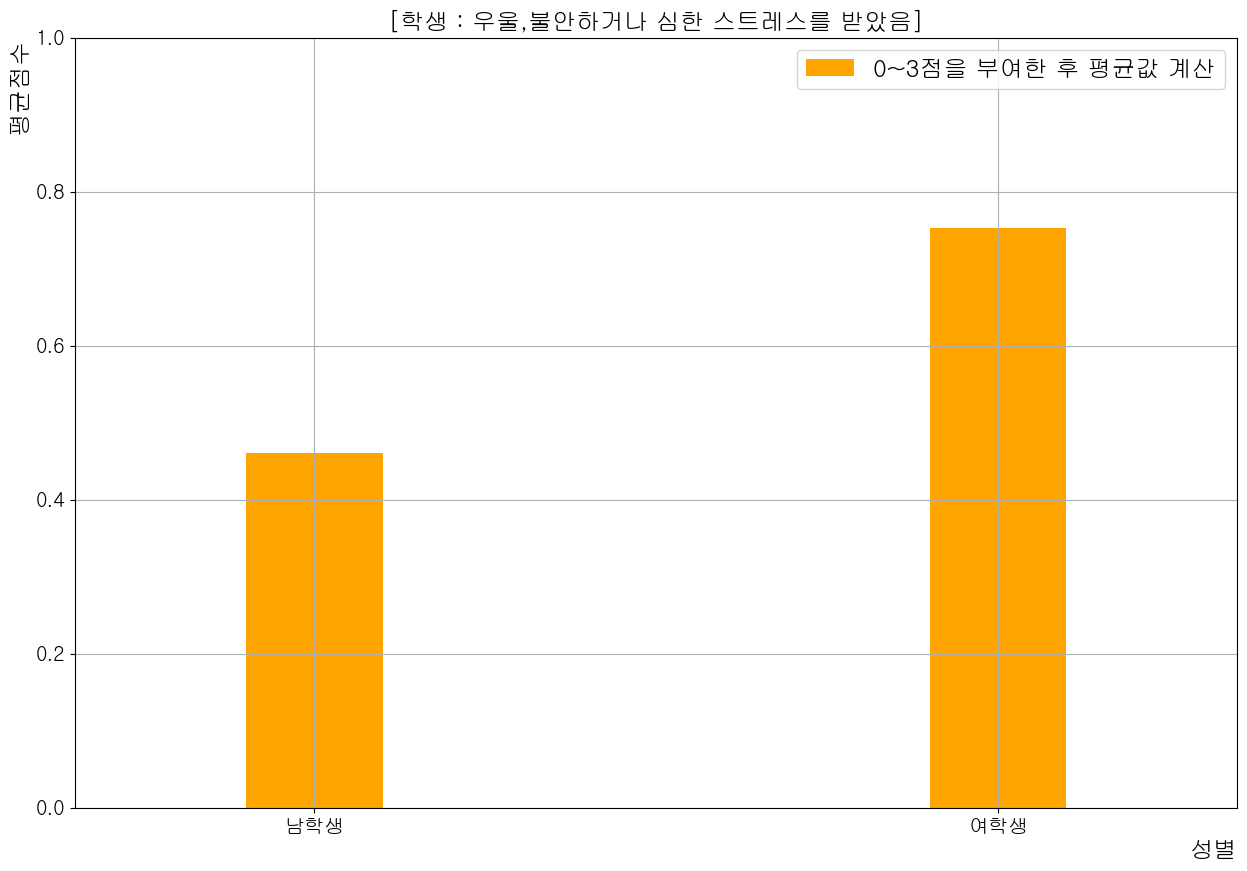

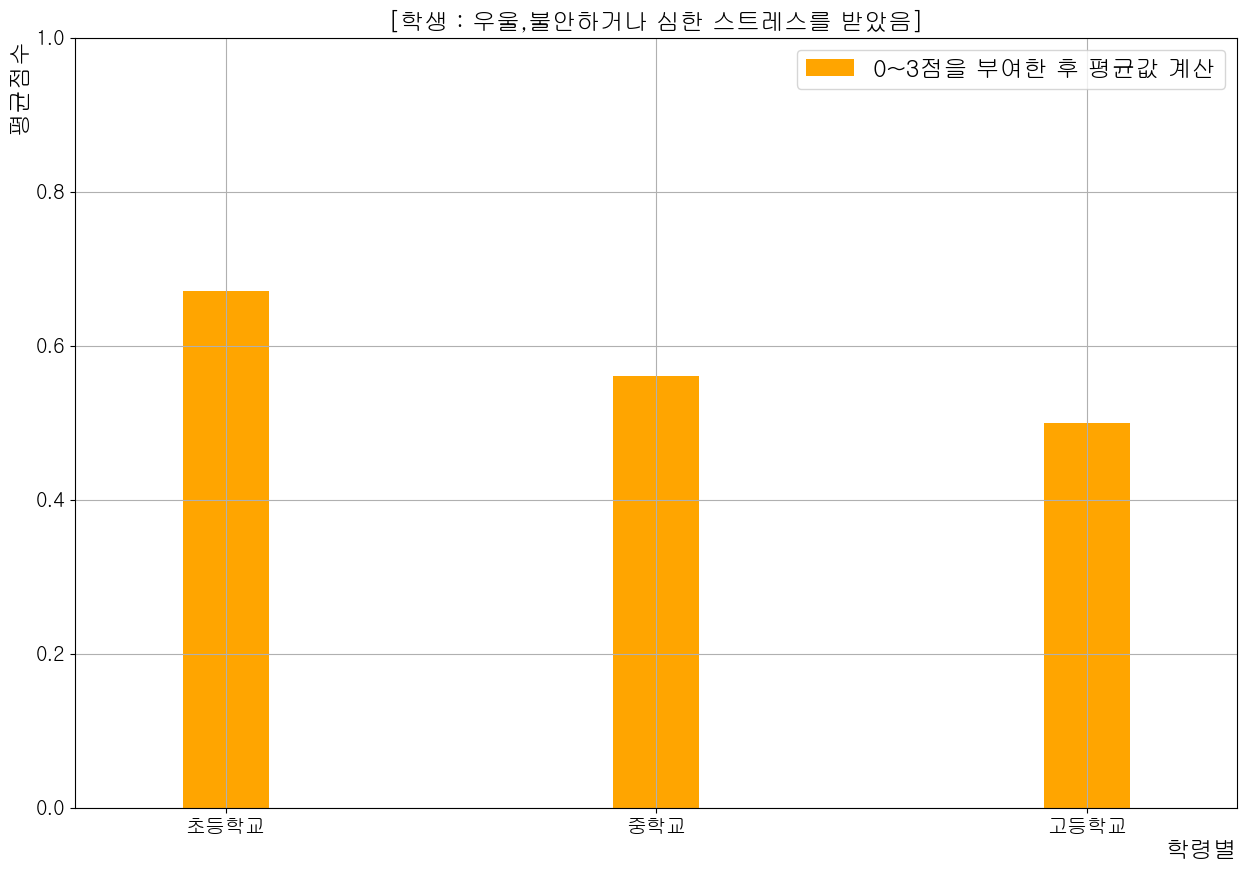

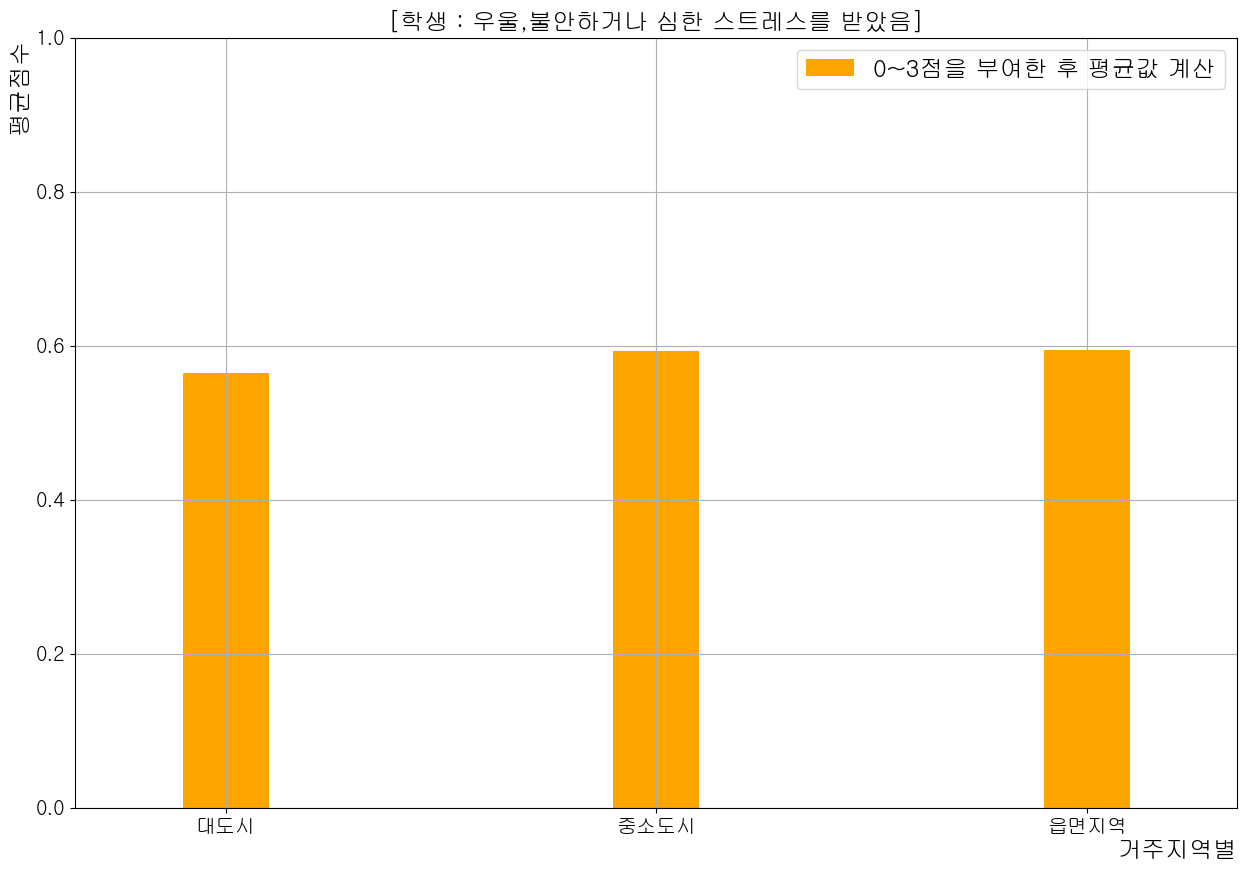

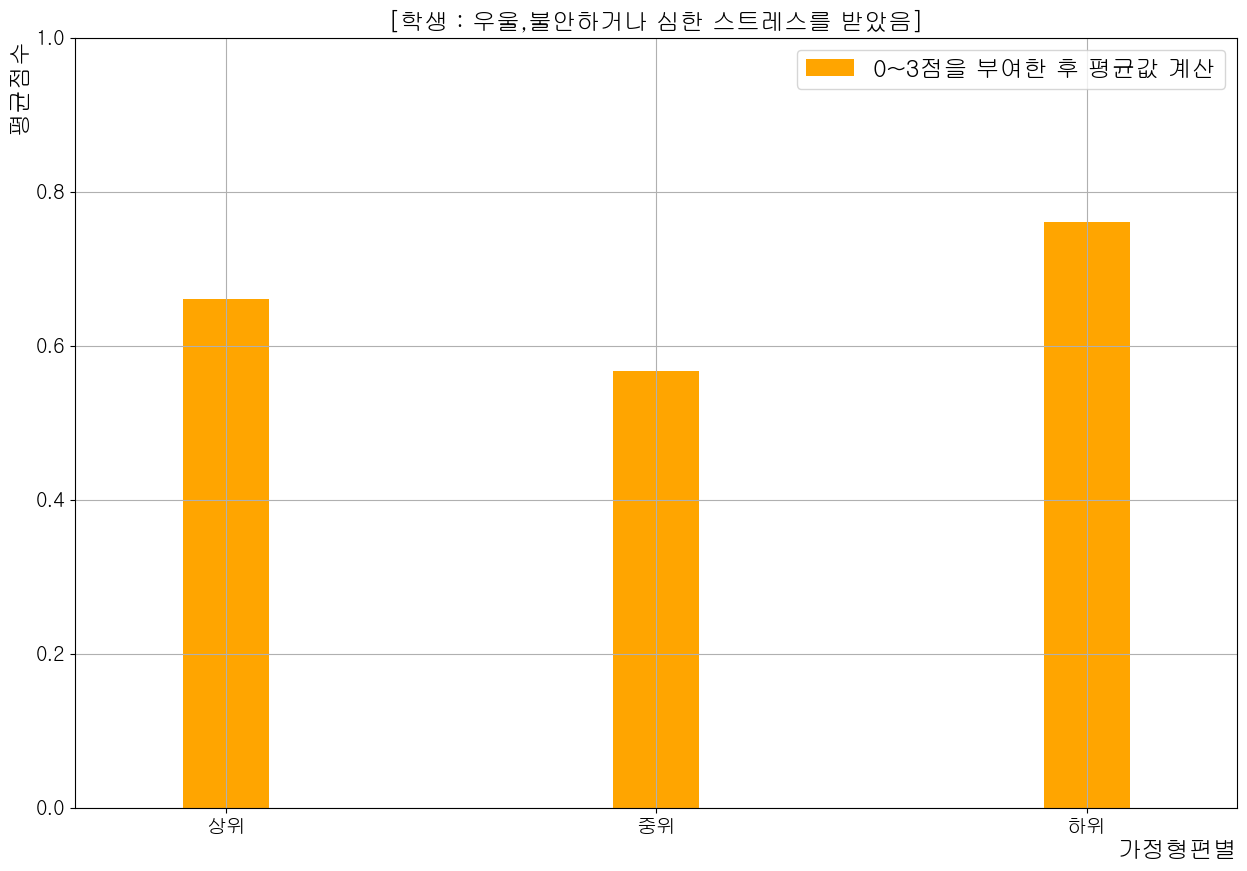

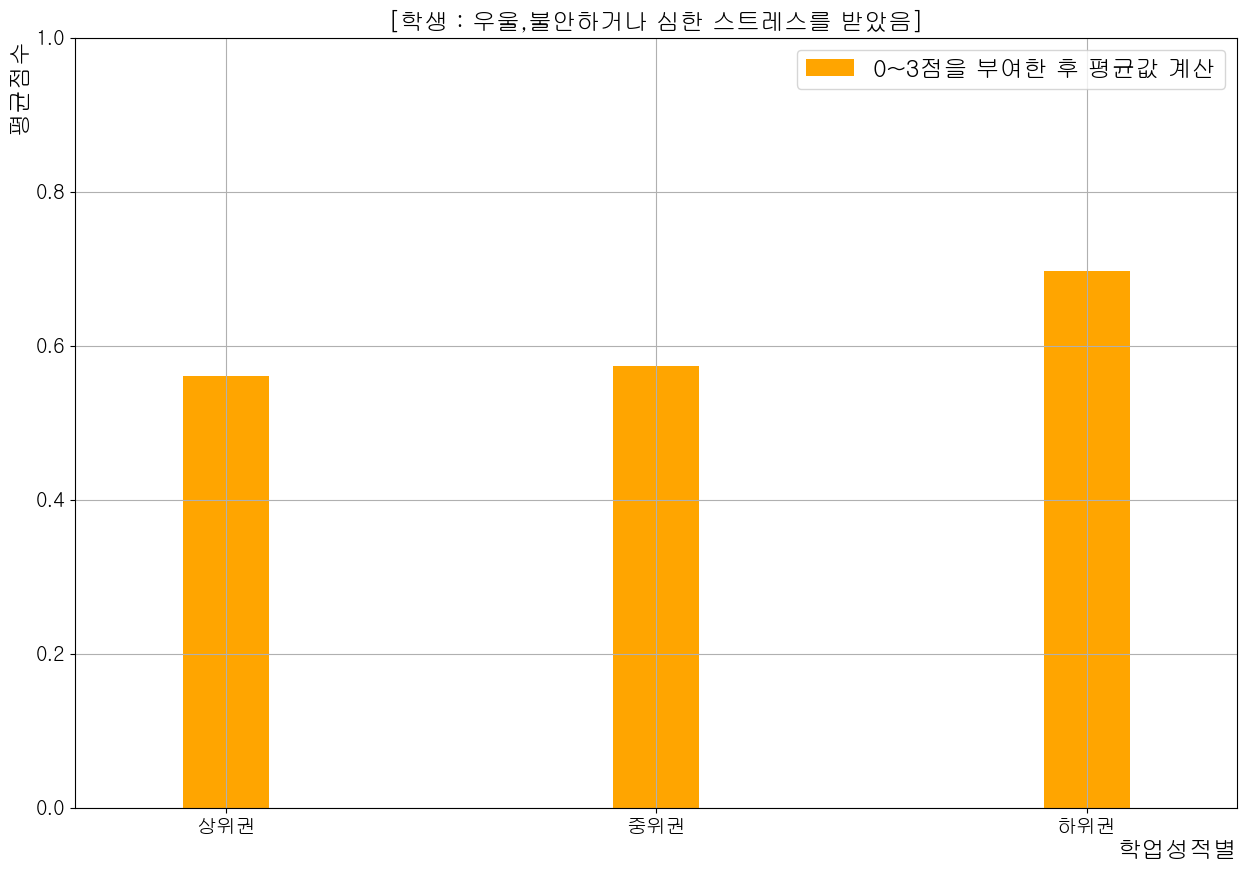

In [70]:
# 그래프 그리기
graph3_stu(gender, '성별')
plt.title('[학생 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_stu(school, '학령별')
plt.title('[학생 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_stu(area, '거주지역별')
plt.title('[학생 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_stu(family, '가정형편별')
plt.title('[학생 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')
graph3_stu(score, '학업성적별')
plt.title('[학생 : 우울,불안하거나 심한 스트레스를 받았음]', fontsize = 'xx-large')

-------------------------------------

In [71]:
file5 = '../data_student/학생피해_사이버폭력_피해_경험_후_심리상태__5잠을_자지_못하거나_두통_복통_등의_증상이_생겼음.csv'
file5 = clean(file5)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전혀 그렇지 않다  30 non-null     float64
 1   그렇지 않다     30 non-null     float64
 2   그렇다        30 non-null     float64
 3   매우 그렇다     30 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB


In [72]:
# 필요한 데이터프레임만 선택하여 분리함
gender = select(file5, '성별')
school = select(file5, '학령별')
area = select(file5, '거주지역별')
family = select(file5, '가정형편별')
score = select(file5, '학업성적별')

gender = calc2(gender)
school = calc2(school)
area = calc2(area)
family = calc2(family)
score = calc2(score)

gender = gender['평균']
school = school['평균']
area = area['평균']
family = family['평균']
score = score['평균']

Text(0.5, 1.0, '[학생 : 잠을 자지 못하거나 두통, 복통 등의 증상이 생겼음]')

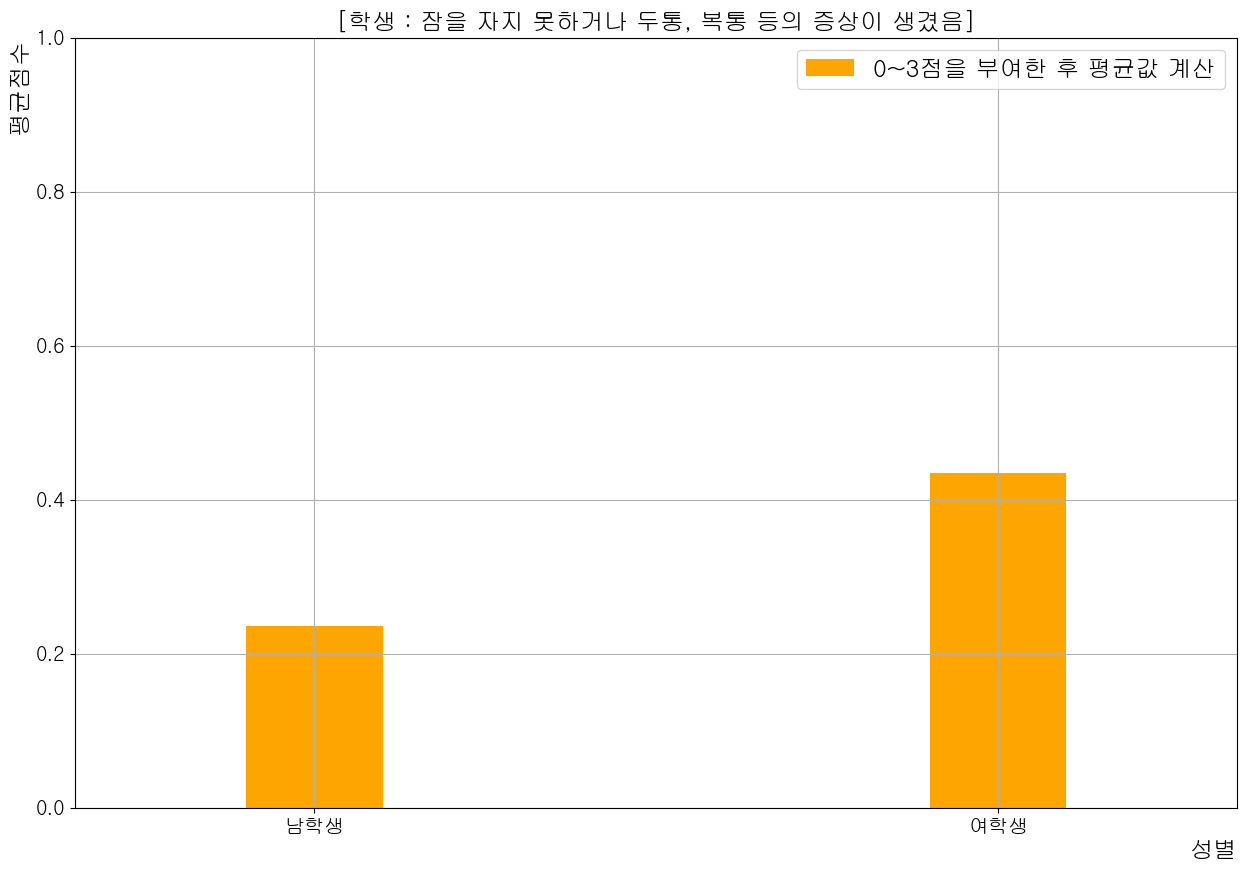

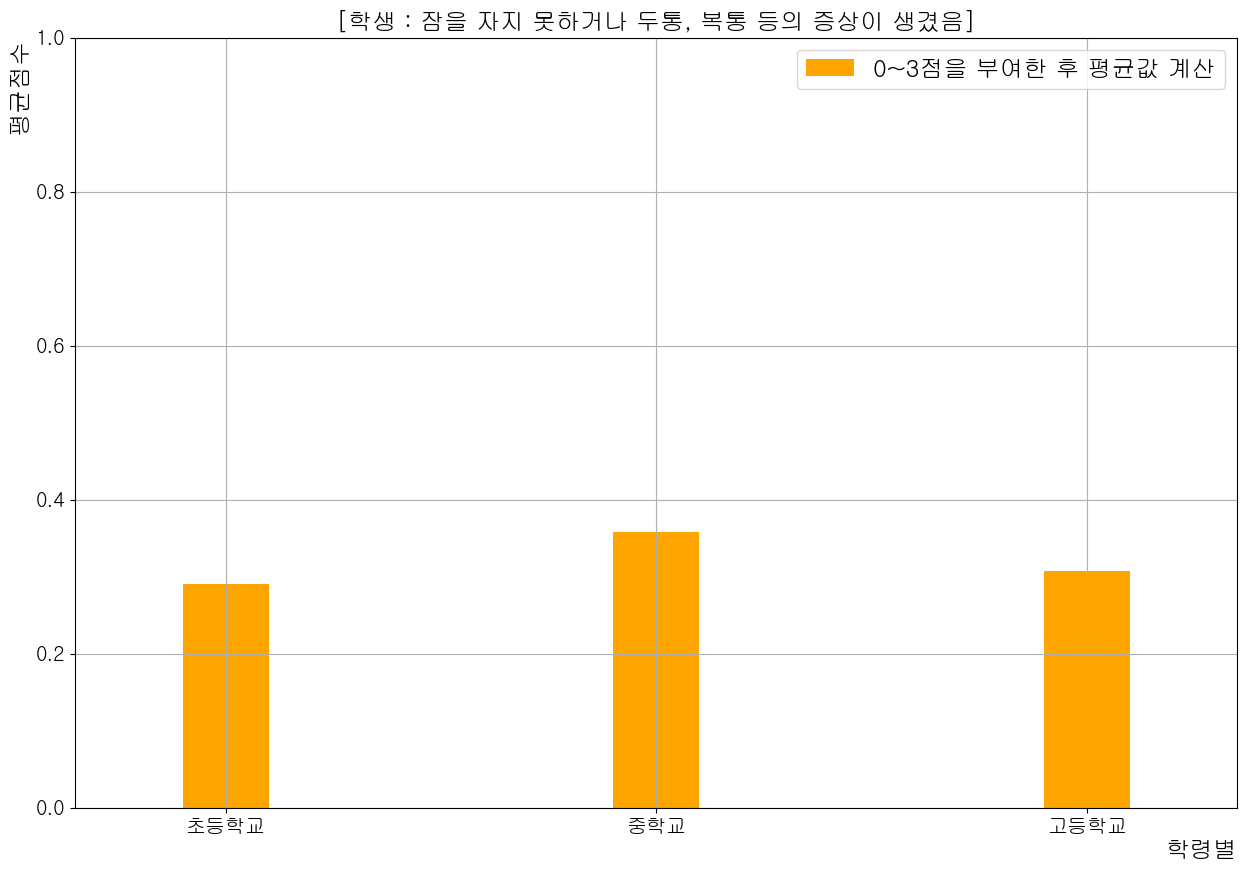

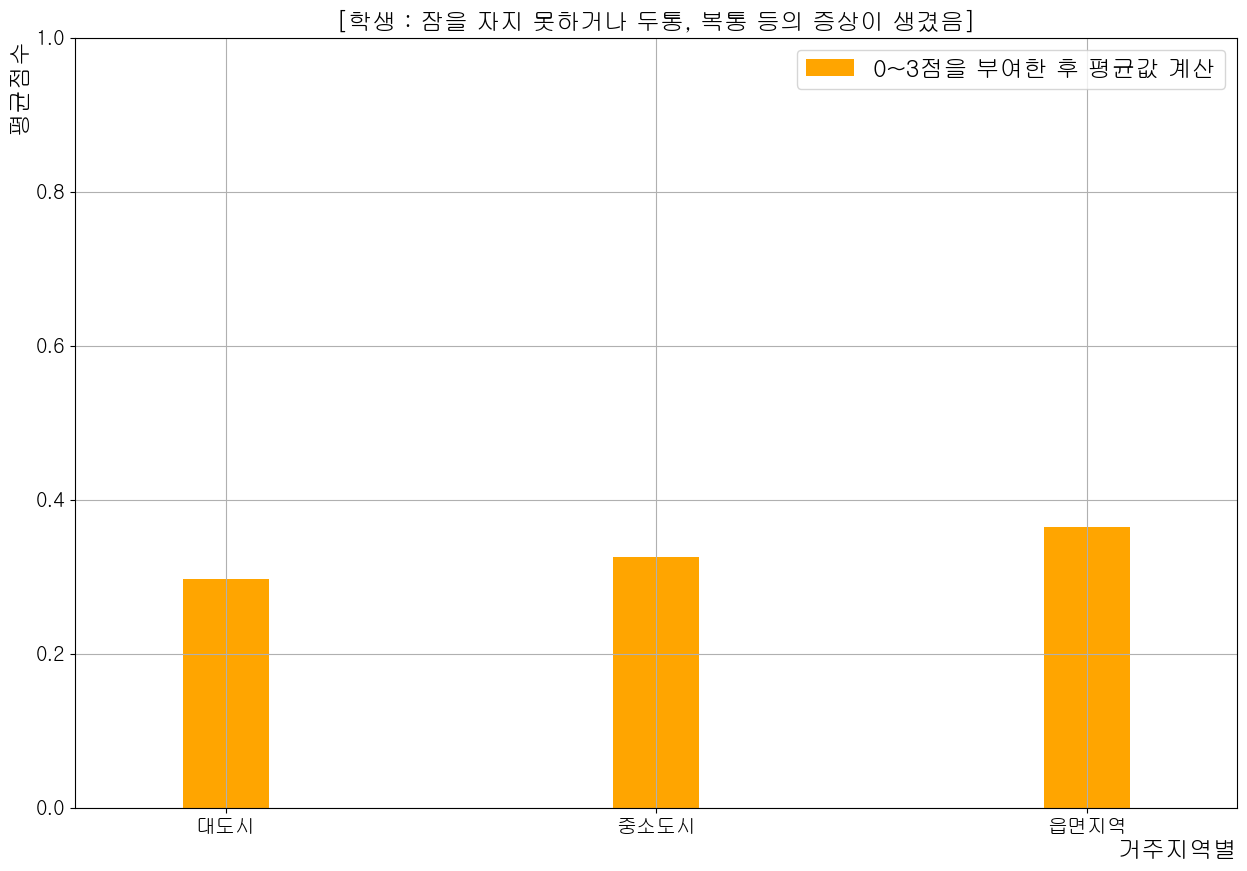

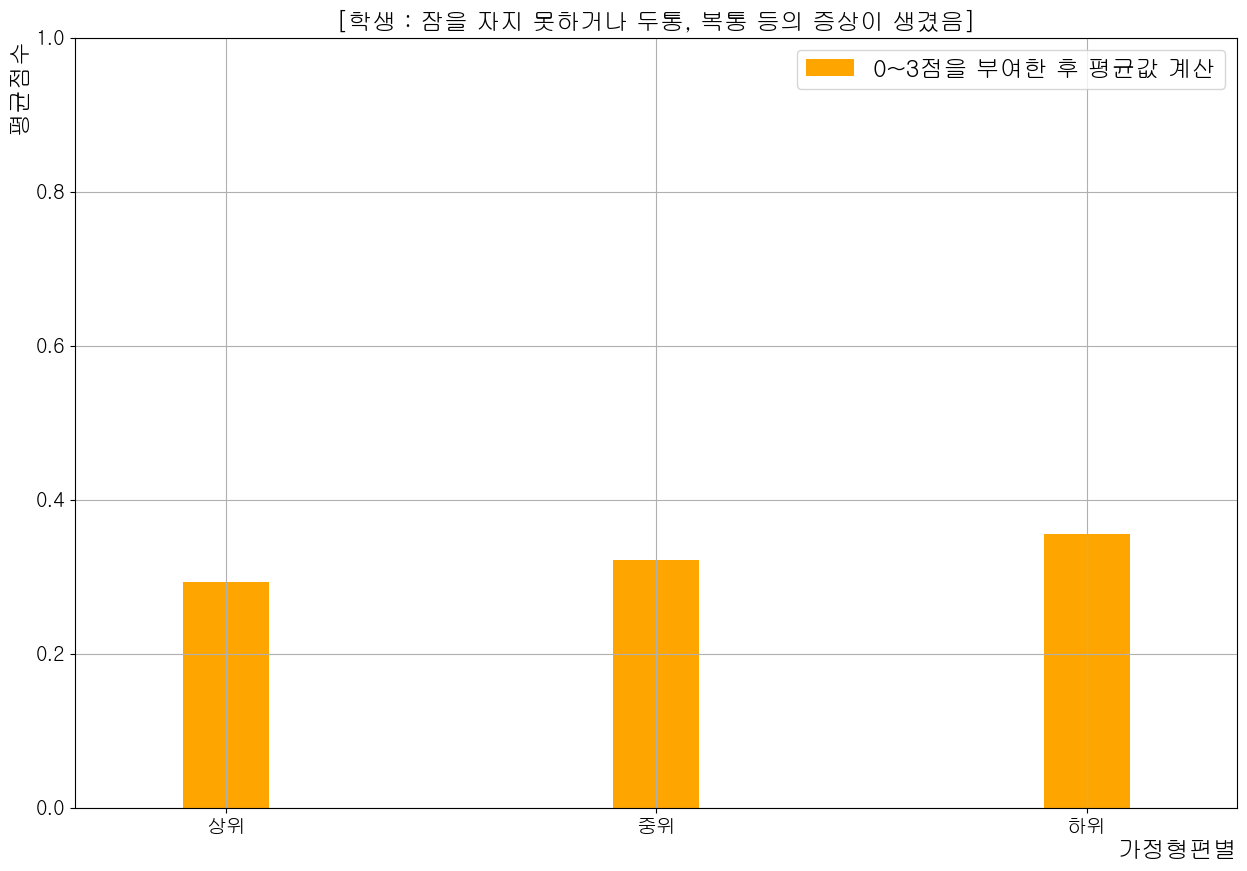

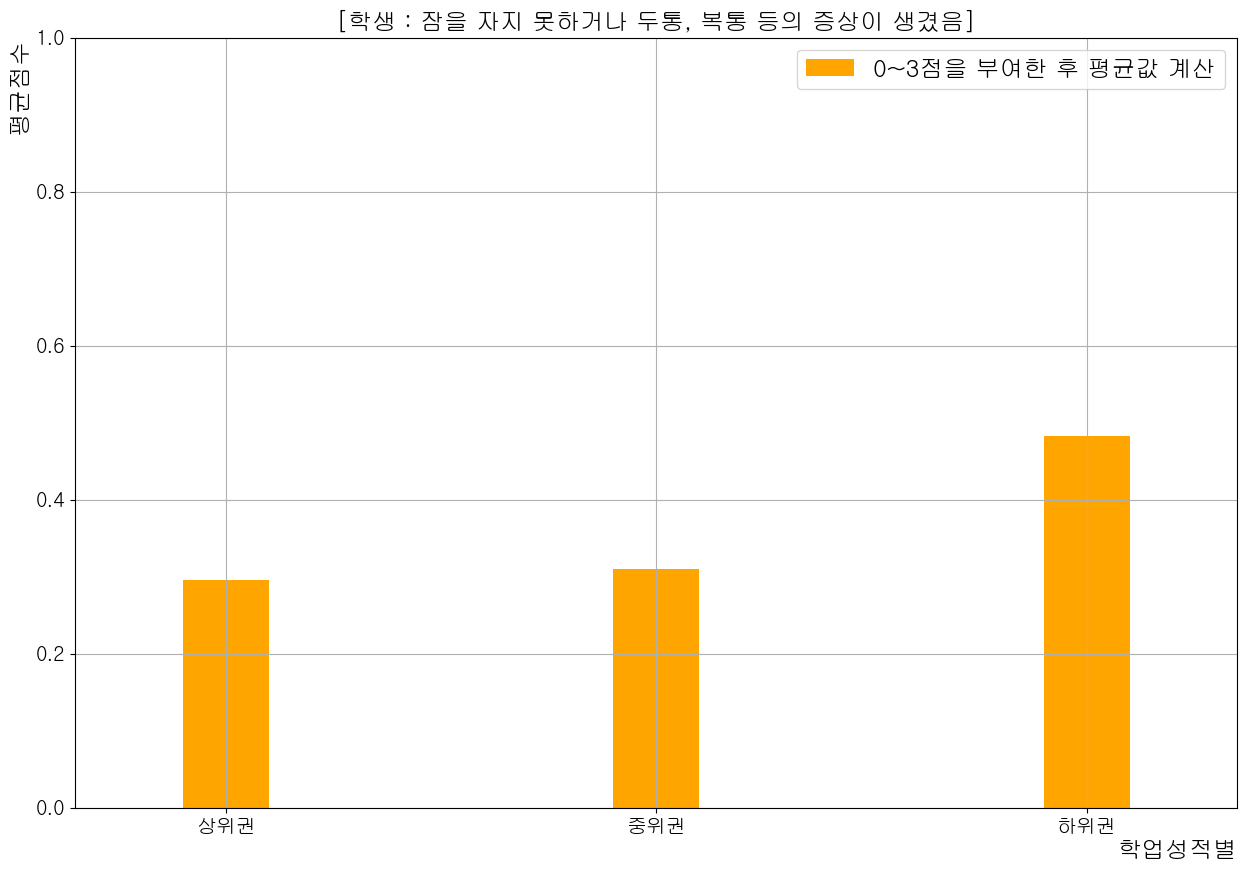

In [73]:
# 그래프 그리기
graph3_stu(gender, '성별')
plt.title('[학생 : 잠을 자지 못하거나 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')
graph3_stu(school, '학령별')
plt.title('[학생 : 잠을 자지 못하거나 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')
graph3_stu(area, '거주지역별')
plt.title('[학생 : 잠을 자지 못하거나 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')
graph3_stu(family, '가정형편별')
plt.title('[학생 : 잠을 자지 못하거나 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')
graph3_stu(score, '학업성적별')
plt.title('[학생 : 잠을 자지 못하거나 두통, 복통 등의 증상이 생겼음]', fontsize = 'xx-large')